# Comparying CSHT between resolutions

How does progressively solving the eddy dynamics on Antarctic Margins can alter the total poleward heat transport towards the Antarctic Shelf, as well as its seasonality,and variability across different timescales? We can compare the 3 resolutions of panan to understand that a little better

**Currently we only have panan01 and panan005 ready, so we will have to stick to those :/**

In [1]:
import cosima_cookbook as cc
import matplotlib.pyplot as plt
import cmocean as cm
import numpy as np
from dask.distributed import Client
from scipy.interpolate import interp1d

import xarray as xr
import cf_xarray as cfxr

In [2]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 7
Total threads: 28,Total memory: 251.20 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:36323,Workers: 7
Dashboard: /proxy/8787/status,Total threads: 28
Started: Just now,Total memory: 251.20 GiB
Comm: tcp://127.0.0.1:46867,Total threads: 4
Dashboard: /proxy/38341/status,Memory: 35.89 GiB
Nanny: tcp://127.0.0.1:37115,


In [3]:
#panan01 daily as f(z,time)
src_p01 = '/home/156/wf4500/v45_wf4500/Project_panan/GH/Panan_HT_ASC/Processed_data/panan01/CSHT_daily_z/*'
#panan005 daily as f(z,time)
src_p005 = '/home/156/wf4500/v45_wf4500/Project_panan/GH/Panan_HT_ASC/Processed_data/panan005/CSHT_daily_z/*'
#panan0025 daily as f(z,time)
src_p0025 = '/home/156/wf4500/v45_wf4500/Project_panan/GH/Panan_HT_ASC/Processed_data/panan0025/CSHT_monthly_z/*'

lat_slice  = slice(-83,-59)

figdir='/home/156/wf4500/v45_wf4500/Project_panan/GH/Panan_HT_ASC/figs/'

In [4]:
#importing panan01
import glob
gl =glob.glob(src_p01)
gl=sorted(gl)
print("%i netcdf data files"%len(gl))
p01_HT=xr.open_mfdataset(gl, concat_dim='time', combine='nested').rename({'zl':'z_l'})

12 netcdf data files


In [5]:
#importing panan005
gl =glob.glob(src_p005)
gl=sorted(gl)
print("%i netcdf data files"%len(gl))
p005_HT=xr.open_mfdataset(gl, concat_dim='time', combine='nested').rename({'zl':'z_l'})

12 netcdf data files


In [6]:
#importing panan0025 - THIS IS AMONTHLY DATA
gl =glob.glob(src_p0025)
gl=sorted(gl)
print("%i netcdf data files"%len(gl))
p0025_HT=xr.open_mfdataset(gl, concat_dim='time', combine='nested')
#matching time  for climatological means
p0025_HT['time']=np.array(p0025_HT.time+1)

12 netcdf data files


### Vertically integrating panan

In [7]:
P01_unbinned_HT=p01_HT.unbinned_heat_transp_across_contour.sum('z_l')
P01_binned_CSHT=p01_HT.binned_cross_slope_heat_trans.sum('z_l')
P01_binned_ZC=p01_HT.zonal_convergence.sum('z_l')

In [8]:
P005_unbinned_HT=p005_HT.unbinned_heat_transp_across_contour.sum('z_l')
P005_binned_CSHT=p005_HT.binned_cross_slope_heat_trans.sum('z_l')
P005_binned_ZC=p005_HT.zonal_convergence.sum('z_l')

In [9]:
P0025_unbinned_HT=p0025_HT.unbinned_heat_transp_across_contour.sum('z_l')
P0025_binned_CSHT=p0025_HT.binned_cross_slope_heat_trans.sum('z_l')
P0025_binned_ZC=p0025_HT.zonal_convergence.sum('z_l')

In [10]:
#long and lat coordinates panan-01
P01_unbinned_lon=p01_HT.isel(time=0).lon_along_contour
P01_binned_lon=p01_HT.isel(time=0).lon_bin_midpoints
P01_unbinned_lat=p01_HT.isel(time=0).lat_along_contour
P01_binned_lat=p01_HT.isel(time=0).lat_bin_midpoints
#long and lat coordinates panan-005
P005_unbinned_lon=p005_HT.isel(time=0).lon_along_contour
P005_binned_lon=p005_HT.isel(time=0).lon_bin_midpoints
P005_unbinned_lat=p005_HT.isel(time=0).lat_along_contour
P005_binned_lat=p005_HT.isel(time=0).lat_bin_midpoints
#long and lat coordinates panan-005
P0025_unbinned_lon=p0025_HT.isel(time=0).lon_along_contour
P0025_binned_lon=p0025_HT.isel(time=0).lon_bin_midpoints
P0025_unbinned_lat=p0025_HT.isel(time=0).lat_along_contour
P0025_binned_lat=p0025_HT.isel(time=0).lat_bin_midpoints

In [11]:
#temporal means for panan01
P01_unbinned_HT_mean=P01_unbinned_HT.groupby('time.month').mean('time').mean('month').load()
P01_binned_CSHT_mean=P01_binned_CSHT.groupby('time.month').mean('time').mean('month').load()
P01_binned_ZC_mean=P01_binned_ZC.groupby('time.month').mean('time').mean('month').load()

In [12]:
#temporal means for panan005
P005_unbinned_HT_mean=P005_unbinned_HT.groupby('time.month').mean('time').mean('month').load()
P005_binned_CSHT_mean=P005_binned_CSHT.groupby('time.month').mean('time').mean('month').load()
P005_binned_ZC_mean=P005_binned_ZC.groupby('time.month').mean('time').mean('month').load()

In [13]:
#temporal means for panan0025 - THIS IS ALREADY MONTHLY SO YOU CAN STRAIGHT OUT AVERAGE
P0025_unbinned_HT_mean=P0025_unbinned_HT.mean('time').load()
P0025_binned_CSHT_mean=P0025_binned_CSHT.mean('time').load()
P0025_binned_ZC_mean=P0025_binned_ZC.mean('time').load()

In [14]:
#factors
p01_factor=P01_unbinned_HT_mean.sum()/(P01_binned_CSHT_mean+P01_binned_ZC_mean).sum()
p005_factor=P005_unbinned_HT_mean.sum()/(P005_binned_CSHT_mean+P005_binned_ZC_mean).sum()
p0025_factor=P0025_unbinned_HT_mean.sum()/(P0025_binned_CSHT_mean+P0025_binned_ZC_mean).sum()

### Mean total (circumpolar) cross-slope-heat-transport

Plot for the mean cumsum of CSHT, unbinned

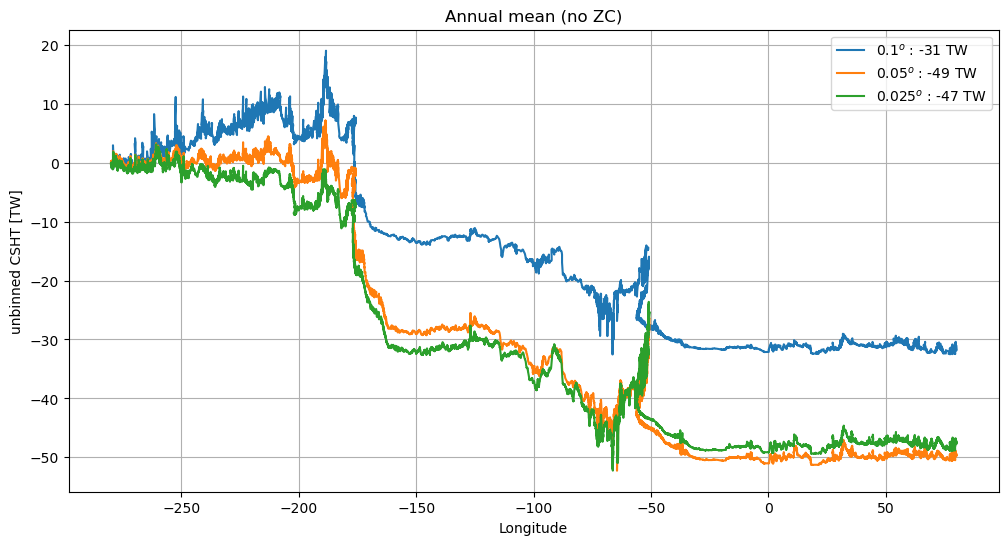

In [15]:
p01_total= int(P01_unbinned_HT_mean.sum().values/1e12)
p005_total= int(P005_unbinned_HT_mean.sum().values/1e12)
p0025_total= int(P0025_unbinned_HT_mean.sum().values/1e12)
fig = plt.figure(figsize=(12,6))

plt.plot(P01_unbinned_lon,P01_unbinned_HT_mean.cumsum()/1e12,label=r"0.1$^{o}$ : " + str(p01_total) + " TW")
plt.plot(P005_unbinned_lon,P005_unbinned_HT_mean.cumsum()/1e12,color="tab:orange",label=r"0.05$^{o}$ : " + str(p005_total) + " TW")
plt.plot(P0025_unbinned_lon,P0025_unbinned_HT_mean.cumsum()/1e12,color="tab:green",label=r"0.025$^{o}$ : " + str(p0025_total) + " TW")
plt.xlabel('Longitude'); plt.ylabel('unbinned CSHT [TW]'); plt.title('Annual mean (no ZC)')
plt.grid()
plt.legend()
plt.savefig(figdir+'RESCOMP_unbinned_HT_cumsum_Annual_mean.png',dpi=300,bbox_inches='tight')

Interestingly, the total CSHT increases with resolution on panan. We have a 18 TW increase for a increase in resolution of 4 times. 
On a counterside tho, it seems like increasing the resolution to 0.025 makes no difference (instead the CSHT decreases). Why?

[a] **Could it be because the calculation for pana was done with the monthly data?**

[b] **Perhaps there is a threshold to solve the dynamics between 0.05 and 0.025 deg?**

Also, looking at the unbinned curves, it seems like a lot of the difference comes from the inner Ross sea [-200 -150] longs. The high noise in the plot, and not accounting for the Zonal COnvergence might be misleading tho

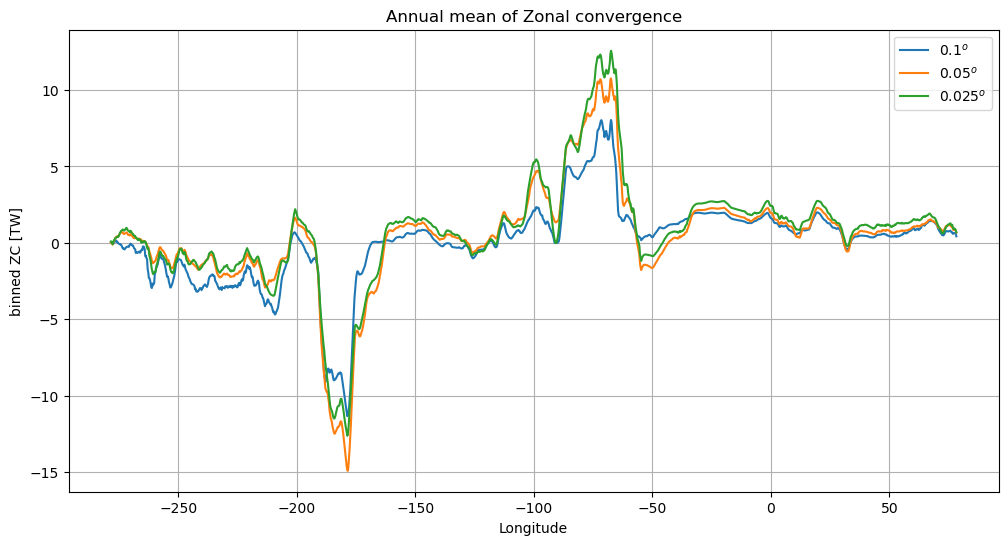

In [16]:
fig = plt.figure(figsize=(12,6))

plt.plot(P01_binned_lon,P01_binned_ZC_mean.cumsum()*p01_factor/1e12,label=r"0.1$^{o}$")
plt.plot(P005_binned_lon,P005_binned_ZC_mean.cumsum()*p005_factor/1e12,color="tab:orange",label=r"0.05$^{o}$")
plt.plot(P0025_binned_lon,P0025_binned_ZC_mean.cumsum()*p0025_factor/1e12,color="tab:green",label=r"0.025$^{o}$")
plt.xlabel('Longitude'); plt.ylabel('binned ZC [TW]'); plt.title('Annual mean of Zonal convergence')
plt.grid()
plt.legend()
plt.savefig(figdir+'RESCOMP_binned_ZC_cumsum_Annual_mean.png',dpi=300,bbox_inches='tight')

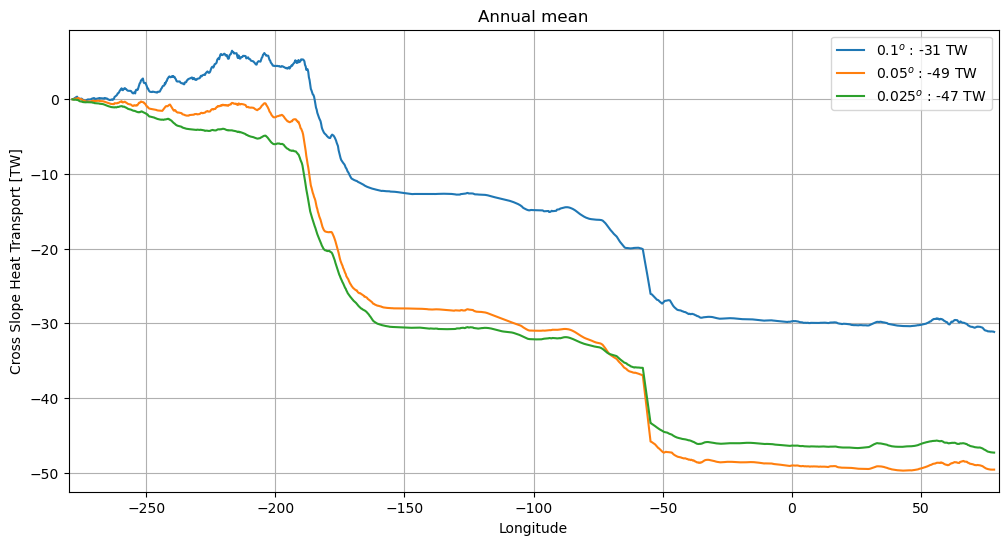

In [17]:
fig = plt.figure(figsize=(12,6))

plt.plot(P01_binned_lon,(P01_binned_CSHT_mean+P01_binned_ZC_mean).cumsum()*p01_factor/1e12,label=r"0.1$^{o}$ : " + str(p01_total) + " TW")
plt.plot(P005_binned_lon,(P005_binned_CSHT_mean+P005_binned_ZC_mean).cumsum()*p005_factor/1e12,color="tab:orange",label=r"0.05$^{o}$ : " + str(p005_total) + " TW")
plt.plot(P0025_binned_lon,(P0025_binned_CSHT_mean+P0025_binned_ZC_mean).cumsum()*p0025_factor/1e12,color="tab:green",label=r"0.025$^{o}$ : " + str(p0025_total) + " TW")
plt.xlabel('Longitude'); plt.ylabel('Cross Slope Heat Transport [TW]'); plt.title('Annual mean')
plt.grid()
plt.legend()
plt.xlim(-280,80)
plt.savefig(figdir+'RESCOMP_binned_HTplusZC_cumsum_Annual_mean.png',dpi=300,bbox_inches='tight')

**One interesting feature is that the poleward heat transport increases with resolution in East Antarctica (E.A), across all resolutions.** That doesnt happen in all other locations tho. The 1/40th resolution likely fully resolves the Eddy field in East Antarctica, but maybe not in inland regions such as inner Weddell.

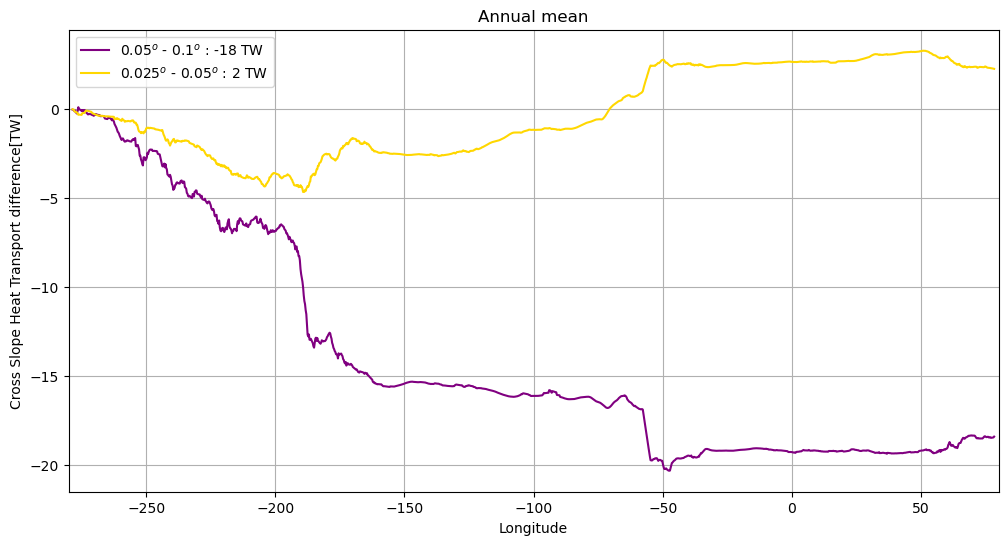

In [18]:
fig = plt.figure(figsize=(12,6))

plt.plot(P005_binned_lon,(P005_binned_CSHT_mean+P005_binned_ZC_mean).cumsum()*p005_factor/1e12 - (P01_binned_CSHT_mean+P01_binned_ZC_mean).cumsum()*p01_factor/1e12\
         ,color="purple",label=r"0.05$^{o}$ - 0.1$^{o}$ : " + str(p005_total - p01_total) + " TW")
plt.plot(P0025_binned_lon,(P0025_binned_CSHT_mean+P0025_binned_ZC_mean).cumsum()*p0025_factor/1e12 -(P005_binned_CSHT_mean+P005_binned_ZC_mean).cumsum()*p005_factor/1e12\
         ,color="gold",label=r"0.025$^{o}$ - 0.05$^{o}$ : " + str(p0025_total - p005_total) + " TW")

plt.xlabel('Longitude'); plt.ylabel('Cross Slope Heat Transport difference[TW]'); plt.title('Annual mean')
plt.grid()
plt.legend()
plt.xlim(-280,80)
plt.savefig(figdir+'RESCOMP_binneddifference_HTplusZC_cumsum_Annual_mean.png',dpi=300,bbox_inches='tight')

In [19]:
#how much the CSHT differs at the edge of the inner Ross sea (-150)?
Ross_cumsum_diff= (((P005_binned_CSHT_mean+P005_binned_ZC_mean).cumsum()*p005_factor/1e12).sel(lon_bin_midpoints=-150, method='nearest')) - (((P01_binned_CSHT_mean+P01_binned_ZC_mean).cumsum()*p01_factor/1e12).sel(lon_bin_midpoints=-150, method='nearest') ) 
print( "CSHT differs by " + str(int(Ross_cumsum_diff)) + " TW, when summing only until the edge of the Ross Sea at 150 West")


CSHT differs by -15 TW, when summing only until the edge of the Ross Sea at 150 West


### Seasonal Cycle changes

Is the difference in CSHT between simulations spread uniformly accross seasons? Or is it summer based ?(related to surface ekman transport)

In [20]:
#temporal means for panan01
P01_unbinned_HT_season=P01_unbinned_HT.groupby('time.month').mean('time').sum('contour_index').load()
P01_binned_CSHT_season=P01_binned_CSHT.groupby('time.month').mean('time').sum('lon_bin_midpoints').load()
P01_binned_ZC_season=P01_binned_ZC.groupby('time.month').mean('time').sum('lon_bin_midpoints').load()

#temporal means for panan005
P005_unbinned_HT_season=P005_unbinned_HT.groupby('time.month').mean('time').sum('contour_index').load()
P005_binned_CSHT_season=P005_binned_CSHT.groupby('time.month').mean('time').sum('lon_bin_midpoints').load()
P005_binned_ZC_season=P005_binned_ZC.groupby('time.month').mean('time').sum('lon_bin_midpoints').load()

#temporal means for panan0025
P0025_unbinned_HT_season=P0025_unbinned_HT.sum('contour_index').load()
P0025_binned_CSHT_season=P0025_binned_CSHT.sum('lon_bin_midpoints').load()
P0025_binned_ZC_season=P0025_binned_ZC.sum('lon_bin_midpoints').load()

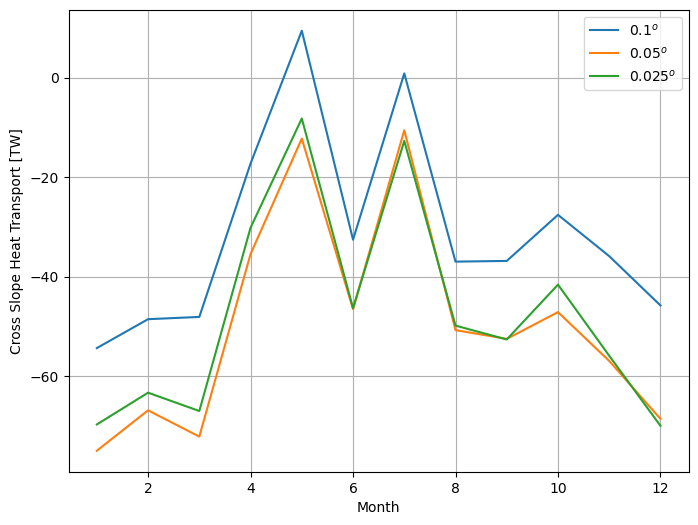

In [21]:
fig = plt.figure(figsize=(8,6))

#plt.subplot(1,2,1)
(P01_unbinned_HT_season/1e12).plot(label=r"0.1$^{o}$")
(P005_unbinned_HT_season/1e12).plot(label=r"0.05$^{o}$")
(P0025_unbinned_HT_season/1e12).plot(label=r"0.025$^{o}$")
plt.xlabel('Month'); plt.ylabel('Cross Slope Heat Transport [TW]')
plt.grid()
plt.legend()

plt.savefig(figdir+'RESCOMP_seasonalCSHT.png',dpi=300,bbox_inches='tight')

Most of the difference in CSHT here happens between September and March, so definetly in the summer and spring. Once again, the bulk difference occurs when comparyinf 0.05 to 0.1

### Cross-slope-heat-transport in different depth layers

One important decision we need to make here is where we gonna set the cutout depth for the surface fluxes. Maybe analysing density surfaces can help us. The series of steps you will use for it will be...

[a] In a annual mean map of surface potrho0, check which contour gets close to the ANtarctic Margin in a more consistent way across all longitudes (if there is)

In [22]:
session = cc.database.create_session()
session_BU = cc.database.create_session('/home/156/wf4500/databases/access/panan_BU.db')

In [23]:
lat_range = slice(-90,-59)
start_time='2000-01'
end_time='2000-12'
time_slice=slice(start_time,end_time)

In [24]:
exp01 = 'panant-01-zstar-ACCESSyr2'
exp005 = 'panant-005-zstar-ACCESSyr2'
exp0025 = 'panan_BU_tiles'

MLD_01 = cc.querying.getvar(exp01,'mlotst',session,frequency='1 monthly',start_time=start_time,end_time=end_time).sel(time=time_slice).sel(yh=lat_range).mean('time')
MLD_005 = cc.querying.getvar(exp005,'mlotst',session,frequency='1 monthly',start_time=start_time,end_time=end_time).sel(time=time_slice).sel(yh=lat_range).mean('time')


/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.07/lib/python3.10/site-packages/xarray/core/dataset.py:278: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.07/lib/python3.10/site-packages/xarray/core/dataset.py:278: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.07/lib/python3.10/site-packages/xarray/core/dataset.py:278: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.07/lib/python3

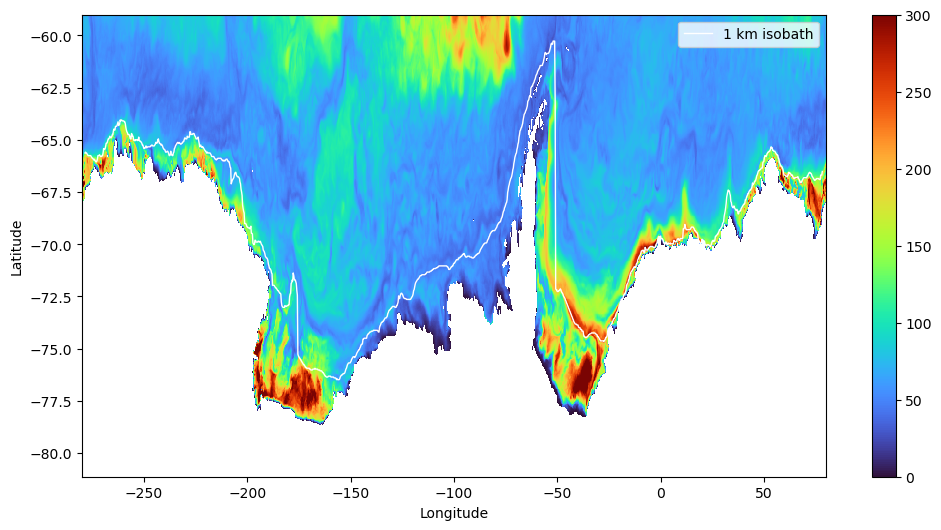

In [25]:
fig = plt.figure(figsize=(12,6))
plt.pcolormesh(MLD_01.xh,MLD_01.yh,MLD_01,vmin=0,vmax=300,cmap='turbo')
plt.colorbar()

plt.plot(P01_binned_lon,P01_binned_lat,color='white',linewidth=1,label='1 km isobath')
plt.xlabel('Longitude'); plt.ylabel('Latitude'); 
plt.legend()

In [26]:
#Extracting densities along the contour
MLD_01_1km= MLD_01.sel(xh=P01_binned_lon,yh=P01_binned_lat,method='nearest')
MLD_005_1km= MLD_005.sel(xh=P005_binned_lon,yh=P005_binned_lat,method='nearest')



In [27]:
#temporal means for panan01
P01_binned_CSHT_z=p01_HT.binned_cross_slope_heat_trans.groupby('time.month').mean('time').mean('month')
P01_binned_ZC_z=p01_HT.zonal_convergence.groupby('time.month').mean('time').mean('month')
P01_binned_CSHT_ZC_z=(P01_binned_CSHT_z+P01_binned_ZC_z)*p01_factor


#temporal means for panan005
P005_binned_CSHT_z=p005_HT.binned_cross_slope_heat_trans.groupby('time.month').mean('time').mean('month')
P005_binned_ZC_z=p005_HT.zonal_convergence.groupby('time.month').mean('time').mean('month')
P005_binned_CSHT_ZC_z=(P005_binned_CSHT_z+P005_binned_ZC_z)*p005_factor


#temporal means for panan0025
P0025_binned_CSHT_z=p0025_HT.binned_cross_slope_heat_trans.mean('time')
P0025_binned_ZC_z=p0025_HT.zonal_convergence.mean('time')
P0025_binned_CSHT_ZC_z=(P0025_binned_CSHT_z+P0025_binned_ZC_z)*p0025_factor

In [28]:
MLD_01_1km.mean().values

array(115.093094, dtype=float32)

(1500.0, 0.0)

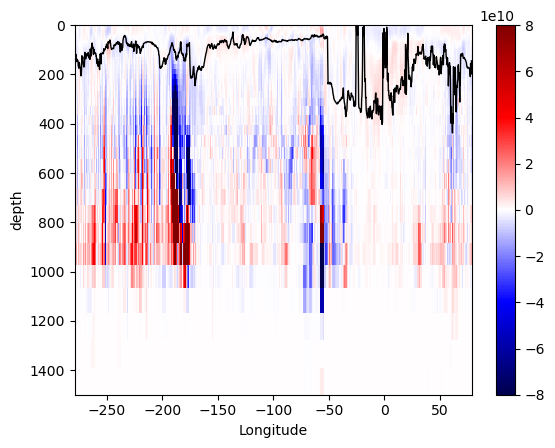

In [29]:
#P01_binned_CSHT_ZC_z.plot()
plt.pcolormesh(P01_binned_CSHT_ZC_z.lon_bin_midpoints,P01_binned_CSHT_ZC_z.z_l,
               P01_binned_CSHT_ZC_z,vmin=-0.8e11,vmax=0.8e11,cmap='seismic')

plt.ylabel('depth'); plt.xlabel('Longitude')
plt.colorbar()

plt.plot(MLD_01_1km.lon_bin_midpoints,MLD_01_1km*1.2,color='black',linewidth=1)
plt.ylim(1500,0)

In [30]:
cutout_depth=MLD_01_1km*1.2

In [31]:
#unbinned MLD
MLD_unbinned01_1km= MLD_01.sel(xh=P01_unbinned_lon,yh=P01_unbinned_lat,method='nearest')
MLD_unbinned005_1km= MLD_005.sel(xh=P005_unbinned_lon,yh=P005_unbinned_lat,method='nearest')
#cutour depth in unbinned data
cutout_depth_unbinned01=MLD_unbinned01_1km*1.2
cutout_depth_unbinned005=MLD_unbinned005_1km*1.2

In [32]:
#temporal means for panan01, unbinned
P01_unbinned_HT_z=p01_HT.unbinned_heat_transp_across_contour.groupby('time.month').mean('time').mean('month')

(1500.0, 0.0)

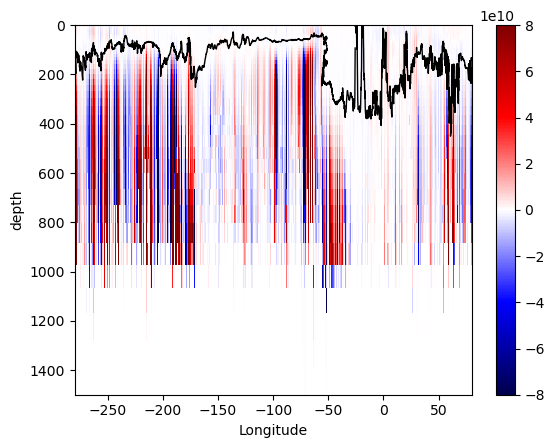

In [33]:
#P01_binned_CSHT_ZC_z.plot()
plt.pcolormesh(P01_unbinned_lon,P01_unbinned_HT_z.z_l,
               P01_unbinned_HT_z,vmin=-0.8e11,vmax=0.8e11,cmap='seismic')

plt.ylabel('depth'); plt.xlabel('Longitude')
plt.colorbar()

plt.plot(P01_unbinned_lon,MLD_unbinned01_1km*1.2,color='black',linewidth=1)
plt.ylim(1500,0)

Unbinned and binned MLD seem similar

### Timeseries of cross-slope-heat-transport

In [34]:
P01_total_daily = P01_unbinned_HT.sum('contour_index')
P005_total_daily = P005_unbinned_HT.sum('contour_index')
P0025_total_daily = P0025_unbinned_HT.sum('contour_index') # this is monthly

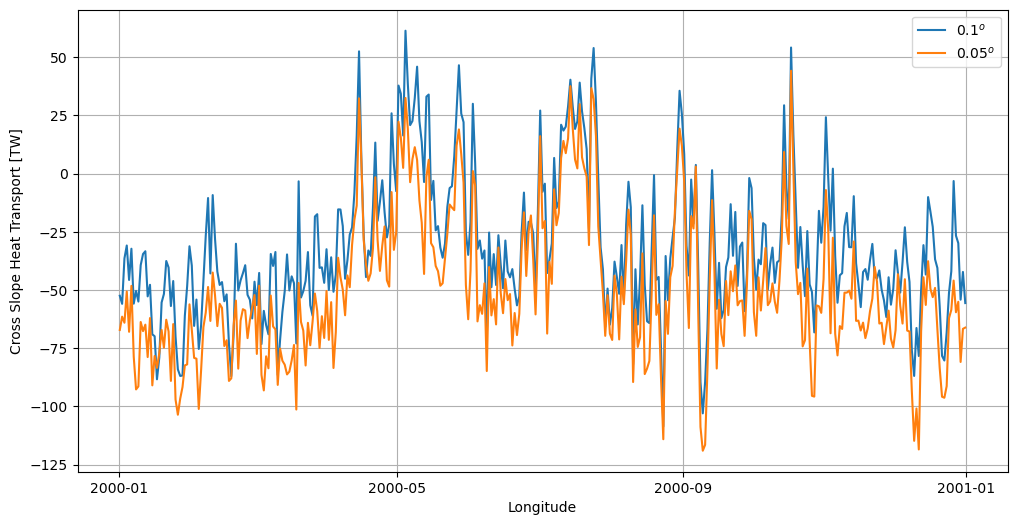

In [35]:
fig = plt.figure(figsize=(12,6))

(P01_total_daily/1e12).plot(label=r"0.1$^{o}$")
((P005_total_daily/1e12)).plot(label=r"0.05$^{o}$")
plt.xlabel('Longitude'); plt.ylabel('Cross Slope Heat Transport [TW]'); 
plt.grid()
plt.legend()
plt.savefig(figdir+'RESCOMP_dailyCSHT.png',dpi=300)

In [36]:
ht_OM2 = cc.querying.getvar('01deg_jra55v13_ryf9091','ht' , session,n=1).sel(yt_ocean=lat_slice)
land_mask_OM2 = np.squeeze(ht_OM2.values)*0
land_mask_OM2[np.isnan(land_mask_OM2)] = 1
land_mask_OM2 = np.where(land_mask_OM2==1,land_mask_OM2,np.nan)
land_mask_masked_OM2 = np.ma.masked_where((land_mask_OM2==0),land_mask_OM2)
# make land go all the way to -90S:
land_mask_lat_OM2 = ht_OM2.yt_ocean.values
land_mask_lat_OM2[0] = -90

#### Spectral analysis of daily data

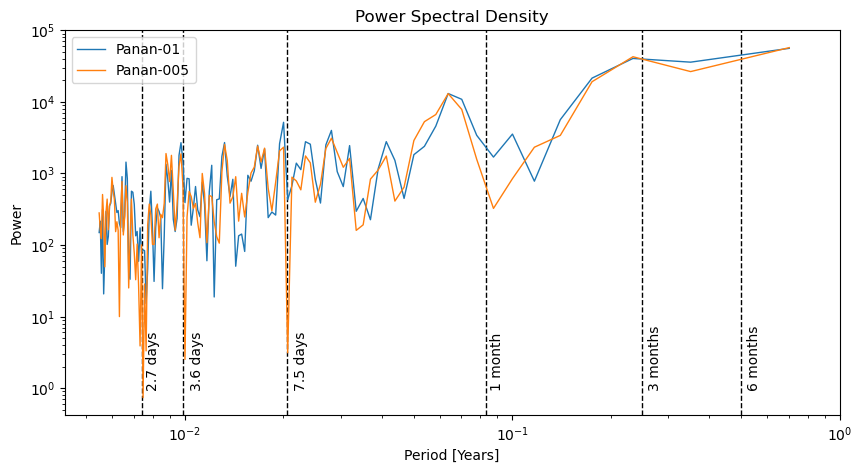

In [37]:
from scipy import signal
# Plot the power spectral density
plt.figure(figsize=(10, 5))


# Compute the power spectral density
frequencies01, psd01 = signal.welch(P01_total_daily/1e12, fs=1)
frequencies005, psd005 = signal.welch(P005_total_daily/1e12, fs=1)
plt.loglog(1/frequencies01/365, psd01, label = 'Panan-01',lw=1)
plt.loglog(1/frequencies005/365, psd005, label = 'Panan-005',lw=1)


plt.title('Power Spectral Density')
plt.vlines(0.5,0,1e6, color='black', linestyle='dashed', zorder=-1,lw=1); plt.text(0.52,1,'6 months',rotation=90)
plt.vlines(1/4,0,1e6, color='black', linestyle='dashed', zorder=-1,lw=1); plt.text(0.26,1,'3 months',rotation=90)
plt.vlines(1/12,0,1e6, color='black', linestyle='dashed', zorder=-1,lw=1); plt.text((1/12)+0.002,1,'1 month',rotation=90)
plt.vlines((1/365)*7.5,0,1e6, color='black', linestyle='dashed', zorder=-1,lw=1); plt.text((1/365)*7.5+0.001,1,'7.5 days',rotation=90)
plt.vlines((1/365)*3.6,0,1e6, color='black', linestyle='dashed', zorder=-1,lw=1); plt.text((1/365)*3.6+0.0005,1,'3.6 days',rotation=90)
plt.vlines((1/365)*2.7,0,1e6, color='black', linestyle='dashed', zorder=-1,lw=1); plt.text((1/365)*2.7+0.0002,1,'2.7 days',rotation=90)
#plt.vlines((1/365)*2.25,0,1e6, color='black', linestyle='dashed', zorder=-1,lw=1);


plt.xlabel('Period [Years]')
plt.ylabel('Power')
plt.xlim(0,1)
# plt.grid()
plt.legend()
plt.savefig(figdir+'RES_CSHT_spectrum.png',dpi=300)

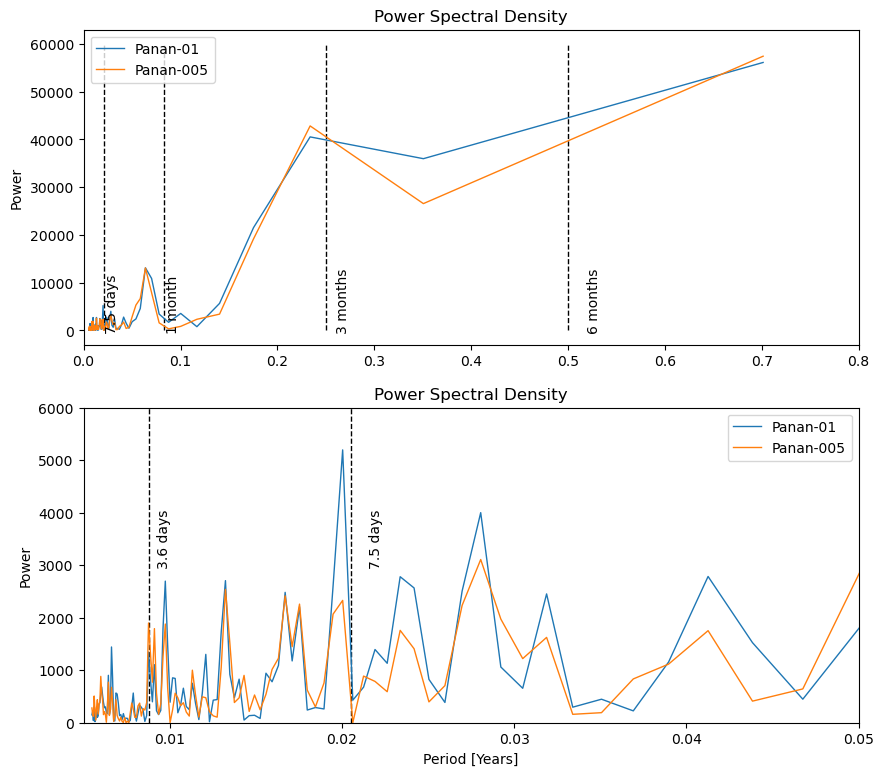

In [38]:
from scipy import signal
# Plot the power spectral density
plt.figure(figsize=(10, 9))

plt.subplot(2,1,1)
# Compute the power spectral density
frequencies01, psd01 = signal.welch(P01_total_daily/1e12, fs=1)
frequencies005, psd005 = signal.welch(P005_total_daily/1e12, fs=1)
plt.plot(1/frequencies01/365, psd01, label = 'Panan-01',lw=1)
plt.plot(1/frequencies005/365, psd005, label = 'Panan-005',lw=1)


plt.title('Power Spectral Density')
plt.vlines(0.5,0,60000, color='black', linestyle='dashed', zorder=-1,lw=1); plt.text(0.52,1,'6 months',rotation=90)
plt.vlines(1/4,0,60000, color='black', linestyle='dashed', zorder=-1,lw=1); plt.text(0.26,1,'3 months',rotation=90)
plt.vlines(1/12,0,60000, color='black', linestyle='dashed', zorder=-1,lw=1); plt.text((1/12)+0.002,1,'1 month',rotation=90)
plt.vlines((1/365)*7.5,0,60000, color='black', linestyle='dashed', zorder=-1,lw=1); plt.text((1/365)*7.5+0.001,1,'7.5 days',rotation=90)
# plt.vlines((1/365)*3.6,0,1e6, color='black', linestyle='dashed', zorder=-1,lw=1); plt.text((1/365)*3.6+0.0005,1,'3.6 days',rotation=90)
# plt.vlines((1/365)*2.7,0,1e6, color='black', linestyle='dashed', zorder=-1,lw=1); plt.text((1/365)*2.7+0.0002,1,'2.7 days',rotation=90)
#plt.vlines((1/365)*2.25,0,1e6, color='black', linestyle='dashed', zorder=-1,lw=1);


#plt.xlabel('Period [Years]')
plt.ylabel('Power')
plt.xlim(0,0.8)
# plt.grid()
plt.legend()



plt.subplot(2,1,2)
# Compute the power spectral density
plt.plot(1/frequencies01/365, psd01, label = 'Panan-01',lw=1)
plt.plot(1/frequencies005/365, psd005, label = 'Panan-005',lw=1)


plt.title('Power Spectral Density')
plt.vlines((1/365)*7.5,0,60000, color='black', linestyle='dashed', zorder=-1,lw=1); plt.text((1/365)*7.5+0.001,3000,'7.5 days',rotation=90)
plt.vlines((1/365)*3.2,0,60000, color='black', linestyle='dashed', zorder=-1,lw=1); plt.text((1/365)*3.2+0.0005,3000,'3.6 days',rotation=90)
#plt.vlines((1/365)*2.7,0,60000, color='black', linestyle='dashed', zorder=-1,lw=1); plt.text((1/365)*2.7+0.0002,3000,'2.7 days',rotation=90)
#plt.vlines((1/365)*2.25,0,1e6, color='black', linestyle='dashed', zorder=-1,lw=1);


plt.xlabel('Period [Years]')
plt.ylabel('Power')
plt.xlim(0.005,0.05)
plt.ylim(0,6000)
# plt.grid()
plt.legend()


plt.savefig(figdir+'RESlinear_CSHT_spectrum.png',dpi=300,bbox_inches='tight')
plt.show()

Ok, we found this results, in which it shows that at very short timescales ( a week or shorter) panan005 has less variability than pana01. **does that make any sense?** I guess that could mean that...

...The difference in CSHT might come from the mean CSHT, instead of the eddy one. In fact when we see the timeseries of the daily data, the variability seem to be roughly the same, with the main difference being panan005 being shifted to more negative CSHT values. But what does that mean in terms of physical processes? 

[a] Maybe a finer resolution somehow allows more heat to get into the ocean somewhere north of the 1km isobath. That would just lead to more heat transport towards Antarctica in some linear flows? (i.e., same or less ammount of water entering coast through Gyres, but with higher temperatures)

[b] Panan01 and Panan005 differ in terms of bathymetry products, could taht somoehow change the total CSHT?

In [39]:
T_01 = cc.querying.getvar(exp01,'thetao',session,frequency='1 monthly',start_time=start_time,end_time=end_time).sel(time=time_slice).sel(yh=lat_range).mean('time')
T_005 = cc.querying.getvar(exp005,'thetao',session,frequency='1 monthly',start_time=start_time,end_time=end_time).sel(time=time_slice).sel(yh=lat_range).mean('time')
T_0025 = cc.querying.getvar(exp0025,'thetao',session_BU,frequency='1 monthly',start_time=start_time,end_time=end_time).sel(time=time_slice).sel(yh=lat_range).mean('time')

V_01 = cc.querying.getvar(exp01,'volcello',session,ncfile='%month_z%',start_time=start_time,end_time=end_time).sel(time=time_slice).sel(yh=lat_range).mean('time')
V_005 = cc.querying.getvar(exp005,'volcello',session,ncfile='%month_z%',start_time=start_time,end_time=end_time).sel(time=time_slice).sel(yh=lat_range).mean('time')
V_0025 = cc.querying.getvar(exp0025,'volcello',session_BU,ncfile='%month_z%',start_time=start_time,end_time=end_time).sel(time=time_slice).sel(yh=lat_range).mean('time')

/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.07/lib/python3.10/site-packages/xarray/core/dataset.py:278: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.07/lib/python3.10/site-packages/xarray/core/dataset.py:278: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.07/lib/python3.10/site-packages/xarray/core/dataset.py:278: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.07/lib/python3

Mean temperature difference by layers, upper 200m

In [40]:
V_01=V_01.load()

In [41]:
T_005interpsum0=T_005.interp(xh=T_01.xh).interp(yh=T_01.yh)
T_005interpsum=(T_005interpsum0*V_01).sel(z_l=slice(0,200)).sum('z_l') / (V_01).sel(z_l=slice(0,200)).sum('z_l') 
T_01sum=(T_01*V_01).sel(z_l=slice(0,200)).sum('z_l') / (V_01).sel(z_l=slice(0,200)).sum('z_l') 

deltaT_200 = (T_005interpsum - T_01sum).load()

/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.07/lib/python3.10/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.07/lib/python3.10/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.07/lib/python3.10/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.07/lib/python3.10/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.07/lib/python3.10/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
 

In [42]:
T_005interpsum1=(T_005interpsum0*V_01).sel(z_l=slice(200,600)).sum('z_l') / (V_01).sel(z_l=slice(200,600)).sum('z_l') 
T_01sum1=(T_01*V_01).sel(z_l=slice(200,600)).sum('z_l') / (V_01).sel(z_l=slice(200,600)).sum('z_l') 

deltaT_600 = (T_005interpsum1 - T_01sum1).load()

/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.07/lib/python3.10/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


In [43]:
T_005interpsum2=(T_005interpsum0*V_01).sel(z_l=slice(600,1000)).sum('z_l') / (V_01).sel(z_l=slice(600,1000)).sum('z_l') 
T_01sum2=(T_01*V_01).sel(z_l=slice(600,1000)).sum('z_l') / (V_01).sel(z_l=slice(600,1000)).sum('z_l') 

deltaT_1000 = (T_005interpsum2 - T_01sum2).load()

/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.07/lib/python3.10/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


In [44]:
T_005interpsum3=(T_005interpsum0*V_01).sel(z_l=slice(1000,6000)).sum('z_l') / (V_01).sel(z_l=slice(1000,6000)).sum('z_l') 
T_01sum3=(T_01*V_01).sel(z_l=slice(1000,6000)).sum('z_l') / (V_01).sel(z_l=slice(1000,6000)).sum('z_l') 

deltaT_bottom = (T_005interpsum3 - T_01sum3).load()

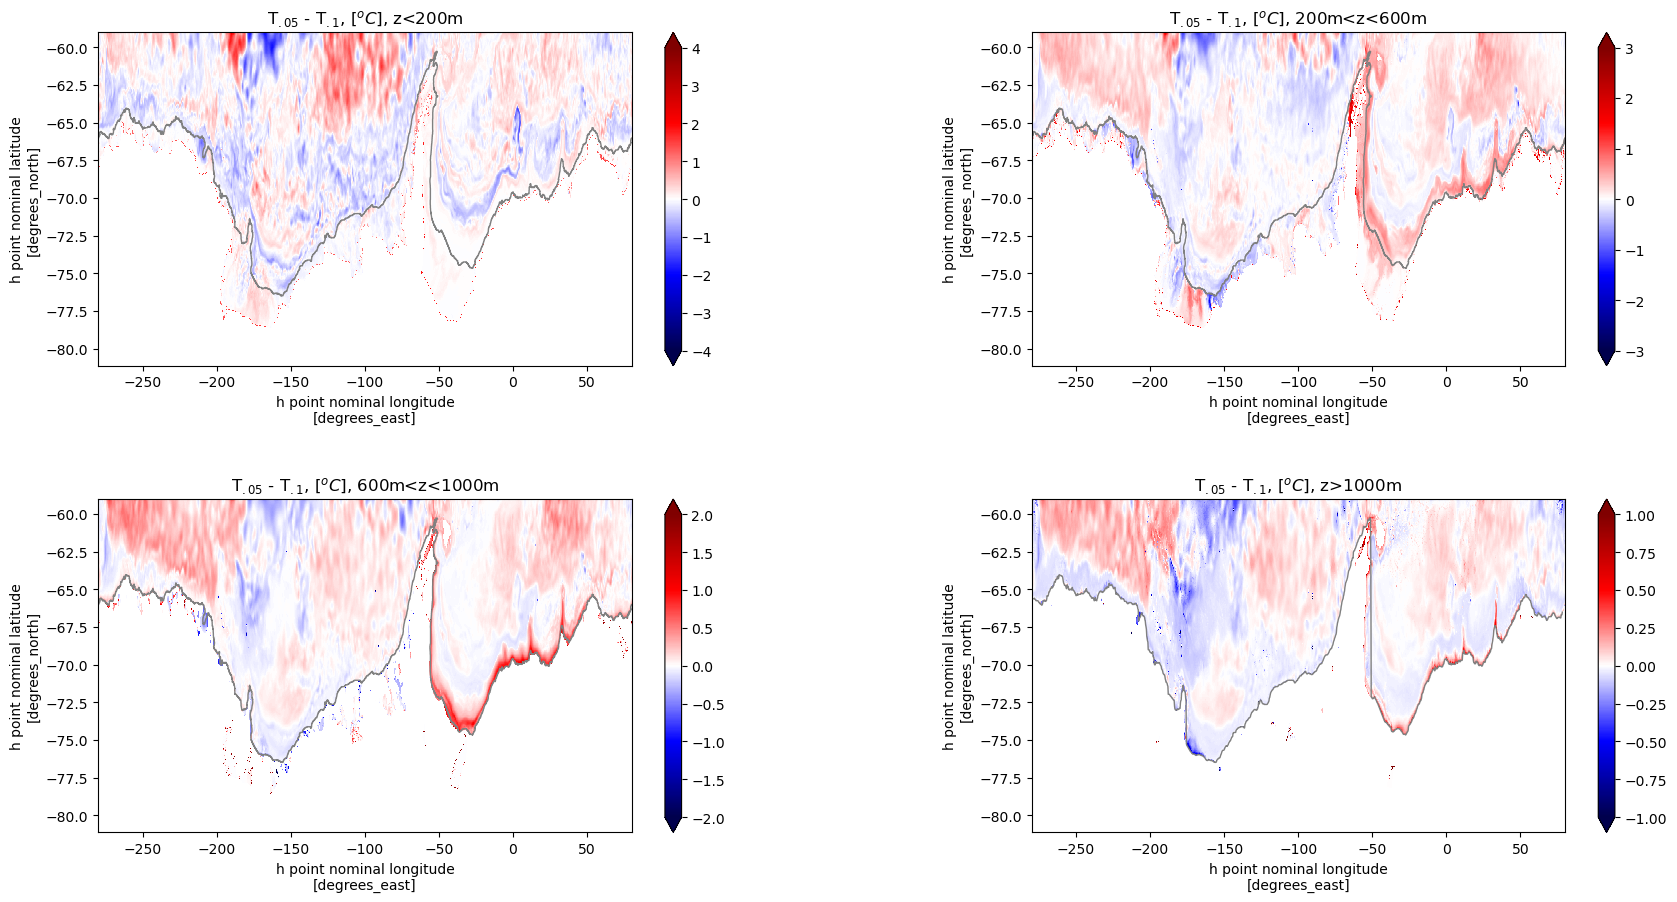

In [45]:
plt.figure(figsize=(20, 10))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

plt.subplot(2,2,1)
deltaT_200.plot(vmin=-4,vmax=4,cmap='seismic',extend='both')
plt.plot(P01_unbinned_lon,P01_unbinned_lat,'grey',lw=1)
plt.title(r"T$_{.05}$ - T$_{.1}$, [$^oC$], z<200m")

plt.subplot(2,2,2)
deltaT_600.plot(vmin=-3,vmax=3,cmap='seismic',extend='both')
plt.plot(P01_unbinned_lon,P01_unbinned_lat,'grey',lw=1)
plt.title(r"T$_{.05}$ - T$_{.1}$, [$^oC$], 200m<z<600m")

plt.subplot(2,2,3)
deltaT_1000.plot(vmin=-2,vmax=2,cmap='seismic',extend='both')
plt.plot(P01_unbinned_lon,P01_unbinned_lat,'grey',lw=1)
plt.title(r"T$_{.05}$ - T$_{.1}$, [$^oC$], 600m<z<1000m")

plt.subplot(2,2,4)
deltaT_bottom.plot(vmin=-1,vmax=1,cmap='seismic',extend='both')
plt.plot(P01_binned_lon,P01_binned_lat,'grey',lw=1)
plt.title(r"T$_{.05}$ - T$_{.1}$, [$^oC$], z>1000m")

plt.savefig(figdir+'RES_temp_diff_005and01.png',dpi=300,bbox_inches='tight')

These temperature anomalies look a lot like the pathway of DSW export that I've seen before. Do we have regional differences in DSW formation or export?  **Christina Schmidt plots for Panan shows that mass transport of Dense Shelf Waters in the Weddell Sea across the 1km and 2.5 km isobath, are bigger in panan005 than in panan01. Based on Adele's paper, stronger DSW formation invites strogner gross-slope heat transport towards the shelf. So perhaps that is what is going on here? How can we test that?**

Perhaps might be worth to check the age at the bottom?

In [46]:
#importing age
age_01 = cc.querying.getvar(exp01,'agessc',session,frequency='1 monthly',start_time=start_time,end_time=end_time).sel(time=time_slice).sel(yh=lat_range).isel(time=-1)
age_005 = cc.querying.getvar(exp005,'agessc',session,frequency='1 monthly',start_time=start_time,end_time=end_time).sel(time=time_slice).sel(yh=lat_range).isel(time=-1)


/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.07/lib/python3.10/site-packages/xarray/core/dataset.py:278: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.07/lib/python3.10/site-packages/xarray/core/dataset.py:278: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.07/lib/python3.10/site-packages/xarray/core/dataset.py:278: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.07/lib/python3

In [47]:
#getting age on the bottom for panan01
depth_array = age_01 * 0 + age_01.z_l
max_depth = depth_array.max(dim = 'z_l', skipna= True)
ageob_01 = age_01.where(depth_array.z_l >= max_depth)
ageob_01 = ageob_01.sum(dim = 'z_l').load()



#getting age on the bottom for panan01
depth_array = age_005 * 0 + age_005.z_l
max_depth = depth_array.max(dim = 'z_l', skipna= True)
ageob_005 = age_005.where(depth_array.z_l >= max_depth)
ageob_005 = ageob_005.sum(dim = 'z_l').load()

ageob_005interp= ageob_005.interp(xh=ageob_01.xh).interp(yh=ageob_01 .yh).load()



agediff=ageob_005interp - ageob_01

Text(0.5, 1.0, 'Age$^{bottom} _{.05}$ - Age$^{bottom} _{.1}$, [$yrs$]')

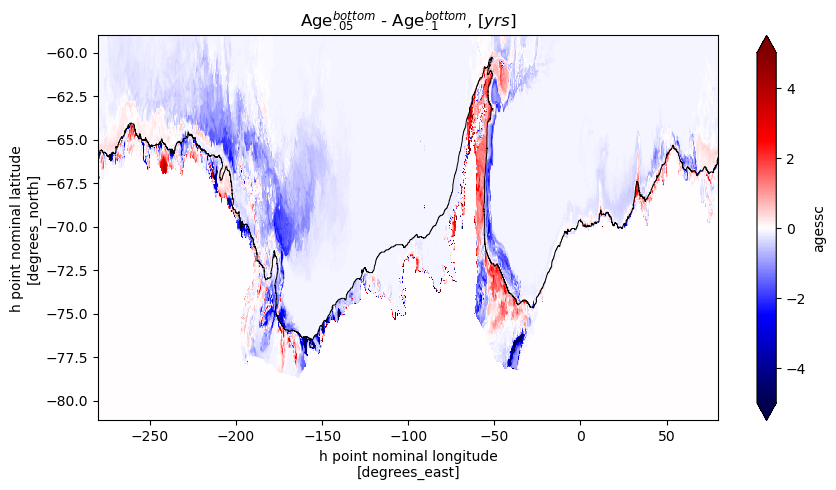

In [48]:
plt.figure(figsize=(10, 5))
agediff.plot(vmin=-5,vmax=5,cmap='seismic',extend='both')
plt.plot(P01_unbinned_lon,P01_unbinned_lat,'black',lw=0.7)
plt.title(r"Age$^{bottom} _{.05}$ - Age$^{bottom} _{.1}$, [$yrs$]")

Close to -50 W, we see enhanced DSW export, and this is close to the location where we have strongest shelf warming. Perhaps the enhanced CSHT we see with the resolution is not due to eddies, but due to the mechanisms of DSW/CDW interchange ( with SSH) that is explained in Morrison (2020). It would be interesting to plot CSHT against DSW export in each resolution to see how that theory matches.

## DSW vs CSHT

It would be usefull to have the DSW export accros the 1km isobath plotted against the CSHT, to see how well they match ( and even correlate them)

Importing volume transports for the year 2000 (in analysis here)

In [49]:
#For panan01
VT_p01= xr.open_dataset('/g/data/e14/cs6673/mom6_comparison/data_DSW/\
vol_transp_across_1000m_isobath_panan_01deg_jra55_ryf_1m_2000.nc')
#For panan005
VT_p005= xr.open_dataset('/g/data/e14/cs6673/mom6_comparison/data_DSW/\
vol_transp_across_1000m_isobath_panan_005deg_jra55_ryf_1m_2000.nc')
#For panan0025
VT_p0025= xr.open_mfdataset('/g/data/e14/cs6673/mom6_comparison/data_DSW/\
vol_transp_across_1000m_isobath_panan_0025deg_jra55_ryf_1m_1999*.nc')


In [50]:
DSW_level=1037.18
VT_p01_annualmean37_18=VT_p01.mean('time').where(VT_p01.rho2_l>=DSW_level).sum('rho2_l')
VT_p005_annualmean37_18=VT_p005.mean('time').where(VT_p005.rho2_l>=DSW_level).sum('rho2_l')
VT_p0025_annualmean37_18=VT_p0025.mean('time').where(VT_p0025.rho2_l>=DSW_level).sum('rho2_l')

Plotting CSHT vs DSW export ( for sigma2>=1037.18)

Getting the longs and lats along mass transport contour


In [51]:
# 	ylength=510;ymax=511;xmax=3601
# 	yh0 = cc.querying.getvar(exp01,'yh',session,n=1)
# 	yh0 = yh0.isel(yh=slice(0,ylength+1))
# 	yq0 = cc.querying.getvar(exp01,'yq',session,n=1).isel(yq=slice(1,ymax+1))
# 	#yq0 = yq0.isel(yq=slice(0,ylength+4))
# 	xh0 = cc.querying.getvar(exp01,'xh',session,n=1)
# 	xq0 = cc.querying.getvar(exp01,'xq',session,n=1).isel(xq=slice(1,xmax))
	
# cutout_latind=510
# 	###########
# 	outfile = '/g/data/e14/cs6673/mom6_comparison/Antarctic_slope_contours/Antarctic_slope_contour_1000m_MOM6_01deg.nc'
# 	data = xr.open_dataset(outfile)
# 	mask_y_transport = data['mask_y_transport']; 
# 	mask_y_transport=mask_y_transport[:cutout_latind,:]       ##############################
# 	mask_x_transport = data['mask_x_transport']; 
# 	mask_x_transport=mask_x_transport[:cutout_latind,:]		################################
# 	mask_y_transport_numbered = data['mask_y_transport_numbered']
# 	mask_y_transport_numbered=mask_y_transport_numbered[:cutout_latind,:]		################################
# 	mask_x_transport_numbered = data['mask_x_transport_numbered']
# 	mask_x_transport_numbered=mask_x_transport_numbered[:cutout_latind,:]		################################
	
	
	# num_points = int(np.maximum(np.max(mask_y_transport_numbered),np.max(mask_x_transport_numbered)))                
	# ############### Getting the lon,lat along contour in the X,Y contour
	# MT01_lat_along_contour = np.zeros((int(np.size(VT_p01_annualmean37_18.contour_index))))
	# MT01_lon_along_contour = np.zeros((int(np.size(VT_p01_annualmean37_18.contour_index))))
	# #locations for zonal transport:
	# x_indices_masked = mask_x_transport_numbered.stack().values
	# x_indices = np.sort(x_indices_masked[x_indices_masked>0])
	# for count in x_indices:
	# 	count = int(count)
	# 	jj = int(np.where(mask_x_transport_numbered==count)[0])
	# 	ii = int(np.where(mask_x_transport_numbered==count)[1])   
	# 	MT01_lon_along_contour[count-1] = mask_x_transport_numbered.xq[ii].values
	# 	MT01_lat_along_contour[count-1] = mask_x_transport_numbered.yh[jj].values
		
	# # locations for meridional transport:
	# y_indices_masked = mask_y_transport_numbered.stack().values
	# y_indices = np.sort(y_indices_masked[y_indices_masked>0])
	# for count in y_indices:
	# 	count = int(count)
	# 	jj = np.where(mask_y_transport_numbered==count)[0]
	# 	ii = np.where(mask_y_transport_numbered==count)[1]
	# 	MT01_lon_along_contour[count-1] = mask_x_transport_numbered.xq[ii].values           ##################          ##################          ##################          ##################          ##################          ##################
	# 	MT01_lat_along_contour[count-1] = mask_y_transport_numbered.yq[jj].values
	

In [52]:
	# cutout_latind=1066
	# ########### Import panan005
	# outfile = '/g/data/e14/cs6673/mom6_comparison/Antarctic_slope_contours/Antarctic_slope_contour_1000m_MOM6_005deg.nc'
	# data = xr.open_dataset(outfile)
	# mask_y_transport = data['mask_y_transport']; 
	# mask_y_transport=mask_y_transport[:cutout_latind,:]       ##############################
	# mask_x_transport = data['mask_x_transport']; 
	# mask_x_transport=mask_x_transport[:cutout_latind,:]		################################
	# mask_y_transport_numbered = data['mask_y_transport_numbered']
	# mask_y_transport_numbered=mask_y_transport_numbered[:cutout_latind,:]		################################
	# mask_x_transport_numbered = data['mask_x_transport_numbered']
	# mask_x_transport_numbered=mask_x_transport_numbered[:cutout_latind,:]		################################
	
	
	# num_points = int(np.maximum(np.max(mask_y_transport_numbered),np.max(mask_x_transport_numbered)))                
	
	# ############### Getting the lon,lat along contour in the X,Y contour
	# MT005_lat_along_contour = np.zeros((int(np.size(VT_p005_annualmean37_18.contour_index))))
	# MT005_lon_along_contour = np.zeros((int(np.size(VT_p005_annualmean37_18.contour_index))))
	# #locations for zonal transport:
	# x_indices_masked = mask_x_transport_numbered.stack().values
	# x_indices = np.sort(x_indices_masked[x_indices_masked>0])
	# for count in x_indices:
	# 	count = int(count)
	# 	jj = int(np.where(mask_x_transport_numbered==count)[0])
	# 	ii = int(np.where(mask_x_transport_numbered==count)[1])   
	# 	MT005_lon_along_contour[count-1] = mask_x_transport_numbered.xq[ii].values
	# 	MT005_lat_along_contour[count-1] = mask_x_transport_numbered.yh[jj].values
		
	# # locations for meridional transport:
	# y_indices_masked = mask_y_transport_numbered.stack().values
	# y_indices = np.sort(y_indices_masked[y_indices_masked>0])
	# for count in y_indices:
	# 	count = int(count)
	# 	jj = np.where(mask_y_transport_numbered==count)[0]
	# 	ii = np.where(mask_y_transport_numbered==count)[1]
	# 	MT005_lon_along_contour[count-1] = mask_x_transport_numbered.xq[ii].values           ##################          ##################          ##################          ##################          ##################          ##################
	# 	MT005_lat_along_contour[count-1] = mask_y_transport_numbered.yq[jj].values
	

In [53]:
	# #cutout_latind=1066*2
	# ########### Import panan0025
	# outfile = '/g/data/e14/cs6673/mom6_comparison/Antarctic_slope_contours/Antarctic_slope_contour_1000m_MOM6_0025deg.nc'
	# data = xr.open_dataset(outfile)
	# mask_y_transport = data['mask_y_transport']; 
	# #mask_y_transport=mask_y_transport[:cutout_latind,:]       ##############################
	# mask_x_transport = data['mask_x_transport']; 
	# #mask_x_transport=mask_x_transport[:cutout_latind,:]		################################
	# mask_y_transport_numbered = data['mask_y_transport_numbered']
	# #mask_y_transport_numbered=mask_y_transport_numbered[:cutout_latind,:]		################################
	# mask_x_transport_numbered = data['mask_x_transport_numbered']
	# #mask_x_transport_numbered=mask_x_transport_numbered[:cutout_latind,:]		################################
	
	
	# num_points = int(np.maximum(np.max(mask_y_transport_numbered),np.max(mask_x_transport_numbered)))                
	
	
	
	
	
	# ############### Getting the lon,lat along contour in the X,Y contour
	# MT0025_lat_along_contour = np.zeros((int(np.size(VT_p0025_annualmean37_18.contour_index))))
	# MT0025_lon_along_contour = np.zeros((int(np.size(VT_p0025_annualmean37_18.contour_index))))
	# #locations for zonal transport:
	# x_indices_masked = mask_x_transport_numbered.stack().values
	# x_indices = np.sort(x_indices_masked[x_indices_masked>0])
	# for count in x_indices:
	# 	count = int(count)
	# 	jj = int(np.where(mask_x_transport_numbered==count)[0])
	# 	ii = int(np.where(mask_x_transport_numbered==count)[1])   
	# 	MT0025_lon_along_contour[count-1] = mask_x_transport_numbered.xq[ii].values
	# 	MT0025_lat_along_contour[count-1] = mask_x_transport_numbered.yh[jj].values
		
	# # locations for meridional transport:
	# y_indices_masked = mask_y_transport_numbered.stack().values
	# y_indices = np.sort(y_indices_masked[y_indices_masked>0])
	# for count in y_indices:
	# 	count = int(count)
	# 	jj = np.where(mask_y_transport_numbered==count)[0]
	# 	ii = np.where(mask_y_transport_numbered==count)[1]
	# 	MT0025_lon_along_contour[count-1] = mask_x_transport_numbered.xq[ii].values           ##################          ##################          ##################          ##################          ##################          ##################
	# 	MT0025_lat_along_contour[count-1] = mask_y_transport_numbered.yq[jj].values
	

In [54]:
	# #saving so I dont have to extract again the lon and lat ( it takes to looong)
	# save_dir  = '/home/156/wf4500/v45_wf4500/Project_panan/GH/Panan_HT_ASC/Processed_data/Mass_transport_contours.nc'
	# lon_01=xr.DataArray(MT01_lon_along_contour,name="MT01_lon_along_contour",dims=["Contour_index01"])
	# lon_005=xr.DataArray(MT005_lon_along_contour,name="MT005_lon_along_contour",dims=["Contour_index005"])
	# lon_0025=xr.DataArray(MT0025_lon_along_contour,name="MT0025_lon_along_contour",dims=["Contour_index0025"])
	# lat_01=xr.DataArray(MT01_lat_along_contour,name="MT01_lat_along_contour",dims=["Contour_index01"])
	# lat_005=xr.DataArray(MT005_lat_along_contour,name="MT005_lat_along_contour",dims=["Contour_index005"])
	# lat_0025=xr.DataArray(MT0025_lat_along_contour,name="MT0025_lat_along_contour",dims=["Contour_index0025"])
	
	# data_to_saveuv = xr.merge([lon_01,lat_01,lon_005,lat_005,lon_0025,lat_0025])
	# data_to_saveuv['contour_index01']=np.cumsum(np.zeros(np.size(MT01_lon_along_contour))+1)
	# data_to_saveuv['contour_index005']=np.cumsum(np.zeros(np.size(MT005_lon_along_contour))+1)
	# data_to_saveuv['contour_index0025']=np.cumsum(np.zeros(np.size(MT0025_lon_along_contour))+1)
	# data_to_saveuv.to_netcdf(save_dir)

In [55]:
data_MT=xr.open_dataset('/home/156/wf4500/v45_wf4500/Project_panan/GH/Panan_HT_ASC/Processed_data/Mass_transport_contours.nc')
MT01_lon_along_contour=np.array(data_MT.MT01_lon_along_contour)
MT005_lon_along_contour=np.array(data_MT.MT005_lon_along_contour)
MT0025_lon_along_contour=np.array(data_MT.MT0025_lon_along_contour)
MT01_lat_along_contour=np.array(data_MT.MT01_lat_along_contour)
MT005_lat_along_contour=np.array(data_MT.MT005_lat_along_contour)
MT0025_lat_along_contour=np.array(data_MT.MT0025_lat_along_contour)

In [56]:
#Attributing longs and lats to the contours
VT_p01_annualmean37_18['lonv']=MT01_lon_along_contour
VT_p01_annualmean37_18['contour_index']=MT01_lon_along_contour
VT_p01_annualmean37_18['latv']=MT01_lat_along_contour
VT_p005_annualmean37_18['lonv']=MT005_lon_along_contour
VT_p005_annualmean37_18['contour_index']=MT005_lon_along_contour
VT_p005_annualmean37_18['latv']=MT005_lat_along_contour
VT_p0025_annualmean37_18['lonv']=MT0025_lon_along_contour
VT_p0025_annualmean37_18['contour_index']=MT0025_lon_along_contour
VT_p0025_annualmean37_18['latv']=MT0025_lat_along_contour

In [57]:
# We need to bin the Mass transport into 3 degrees bins

#edgepoints will be:
edgepoints=np.zeros(np.size(P01_binned_CSHT_ZC_z.lon_bin_midpoints)+1)
edgepoints[:-1]= np.array(P01_binned_CSHT_ZC_z.lon_bin_midpoints-0.25)
edgepoints[-1]=P01_binned_CSHT_ZC_z.lon_bin_midpoints[-1]

VT_p01_binnedv=VT_p01_annualmean37_18.groupby_bins("contour_index", edgepoints).sum()
VT_p005_binnedv=VT_p005_annualmean37_18.groupby_bins("contour_index", edgepoints).sum()
VT_p0025_binnedv=VT_p0025_annualmean37_18.groupby_bins("contour_index", edgepoints).sum()

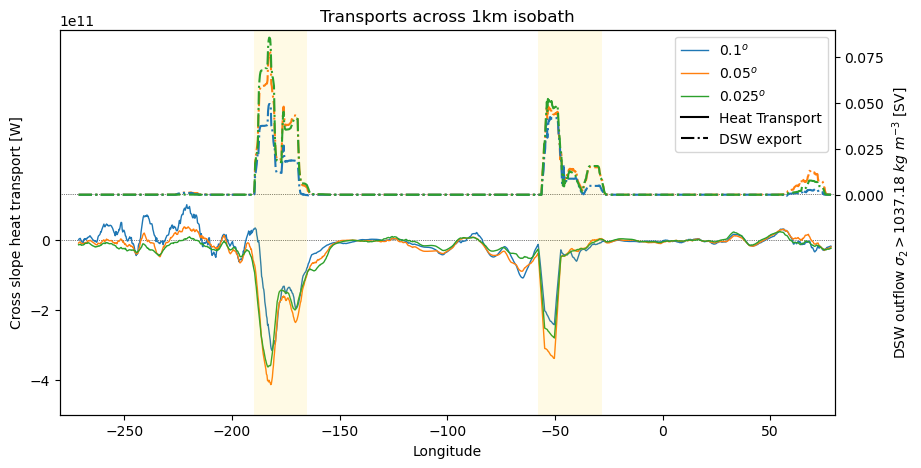

In [58]:
rollwin=30
from matplotlib.patches import Rectangle

#plt.figure(figsize=(10, 5))
fig, ax1 = plt.subplots(figsize=(10, 5))
#CSHT
ax1.plot(P01_binned_CSHT_ZC_z.lon_bin_midpoints,\
         P01_binned_CSHT_ZC_z.sum('z_l').rolling(lon_bin_midpoints=rollwin).mean(),lw=1,label=r"$0.1^{o}$")
ax1.plot(P005_binned_CSHT_ZC_z.lon_bin_midpoints,\
         P005_binned_CSHT_ZC_z.sum('z_l').rolling(lon_bin_midpoints=rollwin).mean(),lw=1,label=r"$0.05^{o}$")
ax1.plot(P0025_binned_CSHT_ZC_z.lon_bin_midpoints,\
         P0025_binned_CSHT_ZC_z.sum('z_l').rolling(lon_bin_midpoints=rollwin).mean(),lw=1,label=r"$0.025^{o}$")

#for labels
ax1.plot([-280,80],[1e13,1e13],color='black',label='Heat Transport',zorder=0)
ax1.plot([-280,80],[1e13,1e13],'-.',color='black',label='DSW export',zorder=0)

ax1.plot([-280,80],[0,0],':',color='black',lw=0.5,zorder=0)
ax1.plot([-280,80],[1.3e11,1.3e11],':',color='black',lw=0.5,zorder=0)
plt.yticks([-4e11,-2e11,0e11])

plt.ylabel('Cross slope heat transport [W]')
plt.legend()
plt.ylim(-5e11,6e11)
plt.xlim(-280,80)
plt.xlabel('Longitude')

#Mass transports
ax2 = ax1.twinx()
ax2.plot(P005_binned_CSHT_ZC_z.lon_bin_midpoints,\
         VT_p005_binnedv.vol_trans_across_contour.rolling(contour_index_bins=rollwin).mean(),\
        '-.',color="tab:orange")

ax2.plot(P01_binned_CSHT_ZC_z.lon_bin_midpoints,\
         VT_p01_binnedv.vol_trans_across_contour.rolling(contour_index_bins=rollwin).mean(),\
        '-.',color="tab:blue")

ax2.plot(P0025_binned_CSHT_ZC_z.lon_bin_midpoints,\
         VT_p0025_binnedv.vol_trans_across_contour.rolling(contour_index_bins=rollwin).mean(),\
        '-.',color="tab:green")


ax2.add_patch(Rectangle((-190,-0.12), 190-165, 0.09+0.12,facecolor='gold',edgecolor ='none',alpha=0.1,zorder=0)) #First strong DSW formation region between [-190,-165]
ax2.add_patch(Rectangle((-58,-0.12), 58-28, 0.09+0.12,facecolor='gold',edgecolor ='none',alpha=0.1,zorder=0))# Second strong DSW formation region between [-58,-28]


plt.ylim(-0.12,0.09)
plt.ylabel(r"DSW outflow $\sigma_{2}>1037.18\ kg\ m^{-3}$ [SV]")
plt.xlim(-280,80)
plt.yticks([0,0.025,0.05,0.075])

plt.title('Transports across 1km isobath')


plt.savefig(figdir+'RES_CSHTvsDSW_along_contour.png',dpi=300,bbox_inches='tight')

One thing to consider is, regions with increased DSW export have stronger CSHT, but the residence time of CDW in these locations is small due to continuous exchange with the Atmosphere in coastal polynyas (check [Morrison et al 2020](https://www.science.org/doi/10.1126/sciadv.aav2516)). So these DSW formation regions *possibly* contribute little to increase in heat content on the Antarctic Shelf. 

**Idea:** It would be interesting to think of ways to remove the effect of the DSW formation on the CSHT (Perhaps by discounting the Heat loss to the Atmosphere on each shelf bin)

In [59]:
# Lets correlate the DSW export with the CSHT. It will tell us how \
# much of the increase in the CSHT with resolution along the contour is explained by the \
# increase in DSW export.


DSW_change=np.nan_to_num(np.array(VT_p005_binnedv.vol_trans_across_contour.rolling(contour_index_bins=rollwin).mean() - VT_p01_binnedv.vol_trans_across_contour.rolling(contour_index_bins=rollwin).mean()),nan=0)
CSHT_change = np.nan_to_num(np.array(P005_binned_CSHT_ZC_z.sum('z_l').rolling(lon_bin_midpoints=rollwin).mean() - P01_binned_CSHT_ZC_z.sum('z_l').rolling(lon_bin_midpoints=rollwin).mean()),nan=0)
coefcorr = np.corrcoef(DSW_change,CSHT_change)[1,0]
detcorr=coefcorr**2

print('Correlation coefficient between the increase in DSW and CSHT (0.1 to 0.05) is ' + str(round(coefcorr,2)), \
      ', DSW export explains ' + str(int(detcorr*100)) + '% of mean CSHT increase along the contour' )




Correlation coefficient between the increase in DSW and CSHT (0.1 to 0.05) is -0.49 , DSW export explains 24% of mean CSHT increase along the contour


How much of the change in CSHT occur in DSW regions? lets see

In [60]:
#mask for the DSW regions above
lon_bin_midpoints_masked=P005_binned_CSHT_ZC_z.lon_bin_midpoints
#masking first region[-190,-165]  [-58,-28]
lon_bin_midpoints_masked = lon_bin_midpoints_masked.where((lon_bin_midpoints_masked<=-190) | (lon_bin_midpoints_masked>=-165)).where((lon_bin_midpoints_masked<=-58) | (lon_bin_midpoints_masked>=-28))
lon_bin_midpoints_masked = (lon_bin_midpoints_masked*0) + 1

In [61]:
CSHTincrease_01to005 = (P005_binned_CSHT_ZC_z.sum('z_l').sum() - P01_binned_CSHT_ZC_z.sum('z_l').sum())/1e12
CSHTincrease_01to0025 = (P0025_binned_CSHT_ZC_z.sum('z_l').sum() - P01_binned_CSHT_ZC_z.sum('z_l').sum())/1e12
#All regions except DSW formation
CSHTincrease_01to005_maskedDSW =  ((P005_binned_CSHT_ZC_z.sum('z_l')*lon_bin_midpoints_masked).sum()\
                                   - (P01_binned_CSHT_ZC_z.sum('z_l')*lon_bin_midpoints_masked).sum())/1e12

CSHTincrease_01to0025_maskedDSW =  ((P0025_binned_CSHT_ZC_z.sum('z_l')*lon_bin_midpoints_masked).sum()\
                                   - (P01_binned_CSHT_ZC_z.sum('z_l')*lon_bin_midpoints_masked).sum())/1e12
#Only east Antarctica
CSHTincrease_01to005_EA =  ((P005_binned_CSHT_ZC_z.sum('z_l').where(P005_binned_CSHT_ZC_z.lon_bin_midpoints<=-190)).sum()\
                                   - (P01_binned_CSHT_ZC_z.sum('z_l').where(P01_binned_CSHT_ZC_z.lon_bin_midpoints<=-190)).sum())/1e12

CSHTincrease_01to0025_EA =  ((P0025_binned_CSHT_ZC_z.sum('z_l').where(P0025_binned_CSHT_ZC_z.lon_bin_midpoints<=-190)).sum()\
                                   - (P01_binned_CSHT_ZC_z.sum('z_l').where(P01_binned_CSHT_ZC_z.lon_bin_midpoints<=-190)).sum())/1e12

print("\n1- Total increase in CSHT with resolution (0.1 to 0.05) is of " + str(int(CSHTincrease_01to005)) +\
      " TW, from which " + str(int(CSHTincrease_01to005) - int(CSHTincrease_01to005_maskedDSW )) + " TW or " +\
      str(int((1-np.round(CSHTincrease_01to005_maskedDSW/CSHTincrease_01to005,2))*100)) + \
      " % occurs in DSW formation \n\n" + \
     "2- In East Antarctica, between [280W,190W] the increase in CSHT is of " +\
     str(int(CSHTincrease_01to005_EA)) + " TW from 0.1 to 0.05 (" +  \
     str(int(CSHTincrease_01to005_EA*100/CSHTincrease_01to005)) + "% of total), " + \
      " and " + str(int(CSHTincrease_01to0025_EA)) + " from 0.1 to 0.025 (" + \
      str(int(CSHTincrease_01to0025_EA*100/CSHTincrease_01to0025)) + "% of total) \n\n" +\
     "As we can see we have avery interesting increase in CSHT in E.A. folowing the resolution refinement. \nTherefore it is very important to see what is happening in this region...")


1- Total increase in CSHT with resolution (0.1 to 0.05) is of -18 TW, from which -8 TW or 43 % occurs in DSW formation 

2- In East Antarctica, between [280W,190W] the increase in CSHT is of -9 TW from 0.1 to 0.05 (50% of total),  and -13 from 0.1 to 0.025 (84% of total) 

As we can see we have avery interesting increase in CSHT in E.A. folowing the resolution refinement. 
Therefore it is very important to see what is happening in this region...


## East Antarctica - E.A.

We want to know what mechanism is responsible for increasing the CSHT in E.A. ( West of -190W). In tis region specifically, it seems like the CSHT is almost reversed as we increase resolution. Lets separate this region and perform a spectral analysis to see if it gives us an insight on the timescaes of change here

In [62]:
#for panan01
P01_total_daily_EA = P01_binned_CSHT_ZC_z.where(P01_binned_CSHT_ZC_z.lon_bin_midpoints<=-190,drop=True).sum('z_l')
P01_ZC_daily_EA = P01_binned_ZC_z.where(P01_binned_ZC_z.lon_bin_midpoints<=-190,drop=True).sum('z_l')*p01_factor
P01_CSHT_daily_EA = P01_binned_CSHT_z.where(P01_binned_CSHT_z.lon_bin_midpoints<=-190,drop=True).sum('z_l')*p01_factor


#for panan005
P005_total_daily_EA = P005_binned_CSHT_ZC_z.where(P005_binned_CSHT_ZC_z.lon_bin_midpoints<=-190,drop=True).sum('z_l')
P005_ZC_daily_EA = P005_binned_ZC_z.where(P005_binned_ZC_z.lon_bin_midpoints<=-190,drop=True).sum('z_l')*p005_factor
P005_CSHT_daily_EA = P005_binned_CSHT_z.where(P005_binned_CSHT_z.lon_bin_midpoints<=-190,drop=True).sum('z_l')*p005_factor


#for panan0025
P0025_total_daily_EA = P0025_binned_CSHT_ZC_z.where(P0025_binned_CSHT_ZC_z.lon_bin_midpoints<=-190,drop=True).sum('z_l')
P0025_ZC_daily_EA = P0025_binned_ZC_z.where(P0025_binned_ZC_z.lon_bin_midpoints<=-190,drop=True).sum('z_l')*p0025_factor
P0025_CSHT_daily_EA = P0025_binned_CSHT_z.where(P0025_binned_CSHT_z.lon_bin_midpoints<=-190,drop=True).sum('z_l')*p0025_factor

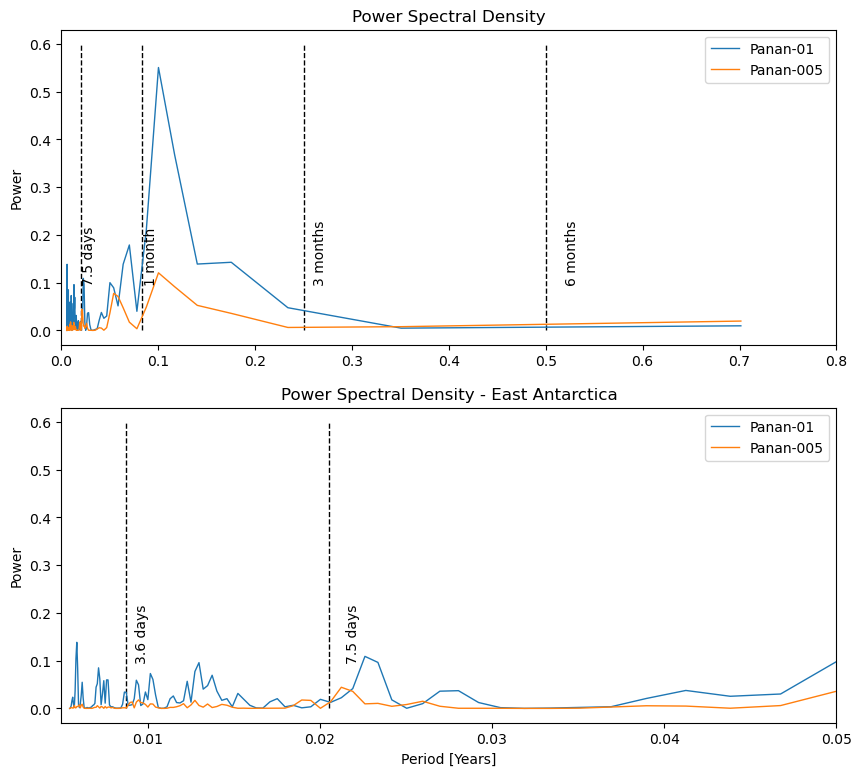

In [63]:
plt.figure(figsize=(10, 9))

plt.subplot(2,1,1)
# Compute the power spectral density
frequencies01, psd01 = signal.welch(P01_total_daily_EA/1e12, fs=1)
frequencies005, psd005 = signal.welch(P005_total_daily_EA/1e12, fs=1)
plt.plot(1/frequencies01/365, psd01, label = 'Panan-01',lw=1)
plt.plot(1/frequencies005/365, psd005, label = 'Panan-005',lw=1)


plt.title('Power Spectral Density')
plt.vlines(0.5,0,0.6, color='black', linestyle='dashed', zorder=-1,lw=1); plt.text(0.52,.1,'6 months',rotation=90)
plt.vlines(1/4,0,0.6, color='black', linestyle='dashed', zorder=-1,lw=1); plt.text(0.26,.1,'3 months',rotation=90)
plt.vlines(1/12,0,0.6, color='black', linestyle='dashed', zorder=-1,lw=1); plt.text((1/12)+0.002,.1,'1 month',rotation=90)
plt.vlines((1/365)*7.5,0,0.6, color='black', linestyle='dashed', zorder=-1,lw=1); plt.text((1/365)*7.5+0.001,.1,'7.5 days',rotation=90)
# plt.vlines((1/365)*3.6,0,1e6, color='black', linestyle='dashed', zorder=-1,lw=1); plt.text((1/365)*3.6+0.0005,1,'3.6 days',rotation=90)
# plt.vlines((1/365)*2.7,0,1e6, color='black', linestyle='dashed', zorder=-1,lw=1); plt.text((1/365)*2.7+0.0002,1,'2.7 days',rotation=90)
#plt.vlines((1/365)*2.25,0,1e6, color='black', linestyle='dashed', zorder=-1,lw=1);


#plt.xlabel('Period [Years]')
plt.ylabel('Power')
plt.xlim(0,0.8)
# plt.grid()
plt.legend()



plt.subplot(2,1,2)
# Compute the power spectral density
plt.plot(1/frequencies01/365, psd01, label = 'Panan-01',lw=1)
plt.plot(1/frequencies005/365, psd005, label = 'Panan-005',lw=1)


plt.title('Power Spectral Density - East Antarctica')
plt.vlines((1/365)*7.5,0,0.6, color='black', linestyle='dashed', zorder=-1,lw=1); plt.text((1/365)*7.5+0.001,0.1,'7.5 days',rotation=90)
plt.vlines((1/365)*3.2,0,0.6, color='black', linestyle='dashed', zorder=-1,lw=1); plt.text((1/365)*3.2+0.0005,0.1,'3.6 days',rotation=90)


plt.xlabel('Period [Years]')
plt.ylabel('Power')
plt.xlim(0.005,0.05)
#plt.ylim(0,0.6)
# plt.grid()
plt.legend()


#plt.savefig(figdir+'RESlinear_EA_CSHT_spectrum.png',dpi=300,bbox_inches='tight')
plt.show()

Again, the power spectrum makes no sense (Or I am really not understanding the results)

Lets zoom in EA and take a look to see if we get any insight

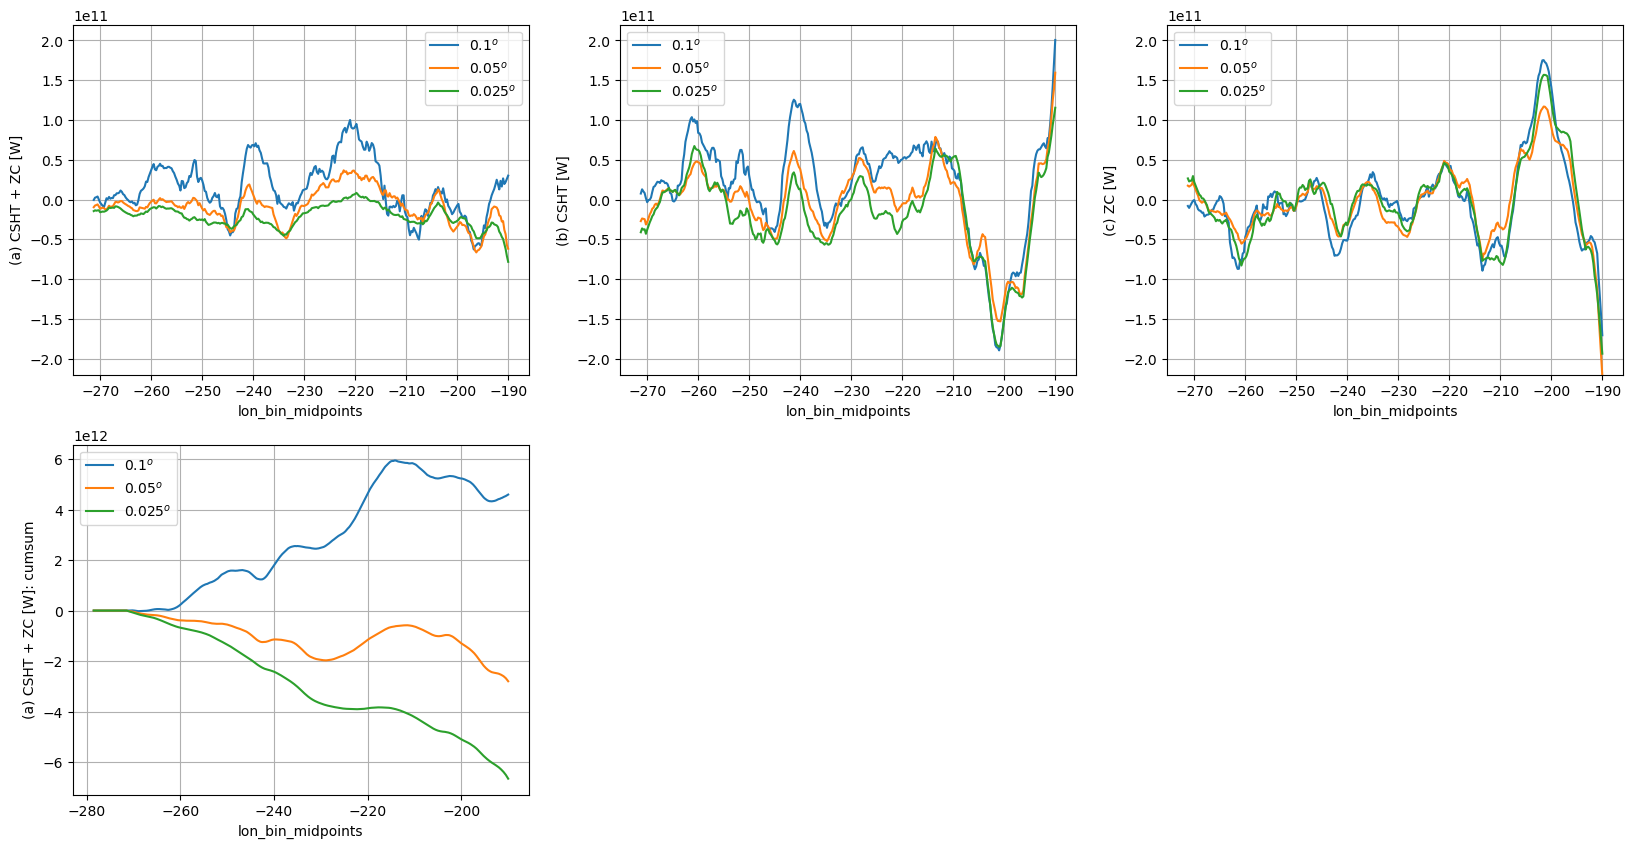

In [64]:

plt.figure(figsize=(20, 10))

plt.subplot(2,3,1)
P01_total_daily_EA.rolling(lon_bin_midpoints=rollwin).mean().plot(label=r"$0.1^{o}$")
P005_total_daily_EA.rolling(lon_bin_midpoints=rollwin).mean().plot(label=r"$0.05^{o}$")
P0025_total_daily_EA.rolling(lon_bin_midpoints=rollwin).mean().plot(label=r"$0.025^{o}$") #actually it is monthly
plt.legend(); plt.ylabel('(a) CSHT + ZC [W]'); plt.ylim([-2.2e11,2.2e11])
plt.grid()

plt.subplot(2,3,2)
P01_CSHT_daily_EA.rolling(lon_bin_midpoints=rollwin).mean().plot(label=r"$0.1^{o}$")
P005_CSHT_daily_EA.rolling(lon_bin_midpoints=rollwin).mean().plot(label=r"$0.05^{o}$")
P0025_CSHT_daily_EA.rolling(lon_bin_midpoints=rollwin).mean().plot(label=r"$0.025^{o}$")#actually it is monthly
plt.legend(); plt.ylabel('(b) CSHT [W]'); plt.ylim([-2.2e11,2.2e11])
plt.grid()


plt.subplot(2,3,3)
P01_ZC_daily_EA.rolling(lon_bin_midpoints=rollwin).mean().plot(label=r"$0.1^{o}$")
P005_ZC_daily_EA.rolling(lon_bin_midpoints=rollwin).mean().plot(label=r"$0.05^{o}$")
P0025_ZC_daily_EA.rolling(lon_bin_midpoints=rollwin).mean().plot(label=r"$0.025^{o}$")#actually it is monthly
plt.legend(); plt.ylabel('(c) ZC [W]'); plt.ylim([-2.2e11,2.2e11])
plt.grid()


plt.subplot(2,3,4)
P01_total_daily_EA.rolling(lon_bin_midpoints=rollwin).mean().cumsum().plot(label=r"$0.1^{o}$")
P005_total_daily_EA.rolling(lon_bin_midpoints=rollwin).mean().cumsum().plot(label=r"$0.05^{o}$")
P0025_total_daily_EA.rolling(lon_bin_midpoints=rollwin).mean().cumsum().plot(label=r"$0.025^{o}$")
plt.legend(); plt.ylabel('(a) CSHT + ZC [W]: cumsum');
plt.grid()

plt.savefig(figdir+'RESEA_CSHT_rollingmean.png',dpi=300,bbox_inches='tight')

Looking at these plots, we can see that there are some patterns that could be dicating the difference...

[I] ~220W, the Northward heat transport is lower on panan0025 than on panan005 than on panan01. This comes locally and direct from the heat crossing the isobath (middle plot), since the zonal convergence is the same in this location for all resolutions (right plot). Might be worth to check this region in particular to see if we can see any changes that can explain that...


[II] Between 270W and 250W, the CSHT is <0 for 0.025, near zero for 0.05, and positive for 0.1. This also seem to be a local signal since a similar pattern is seen on the middle plot (that do not have ZC). The ZC seems to try to compensate the signals, but it doesnt fully (right plot)

[III] In fact, the CSHT is consistently negative in 0.025, except by a small region on 220W.




Ok, the biggest candidate for the increase in CSHT here with resolution in E.A. is the eddy transport. Perhaps we can use the decomposition of eddy = total - mean here too? the only problem is that we only have HT on the last years of the simulation ( unless I calculate them offline for the rest of the simulation).

Panan01 = we have T,u,v for 14 years
Panan005 = we have T,u,v for 19 years
Panan0025 = we have T,u,v ffor 10 years

We can calculate the climatology of u,v,t in each simulation, for the years 1991 to 2000 ( 10 years) , to obtain the mean component of the heat transport, and discount from the timeseries, and then obtain the climatological mean CSHT. LEts do that then!

In [81]:
#importing climatology of HT for panan01
clim_panan01=xr.open_mfdataset('/home/156/wf4500/v45_wf4500/Project_panan/GH/Panan_HT_ASC/Processed_data/panan01/CSHT_mean_CPrhoUhT/Panan01_Ant_cross_slope_heat_terms_offline_1000m_*')
clim_panan005=xr.open_mfdataset('/home/156/wf4500/v45_wf4500/Project_panan/GH/Panan_HT_ASC/Processed_data/panan005/CSHT_mean_CPrhoUhT/Panan005_Ant_cross_slope_heat_terms_offline_1000m_*')


In [82]:
#panan01
P01_clim_unbinnedCSHTmean= clim_panan01.unbinned_heat_transp_across_contour.mean('month').sum('z_l')
P01_clim_binnedCSHTmean= clim_panan01.binned_cross_slope_heat_trans.mean('month').sum('z_l')
P01_clim_binnedZCmean= clim_panan01.zonal_convergence.mean('month').sum('z_l')
P01_clim_binnedCSHTandZCmean = (P01_clim_binnedCSHTmean + P01_clim_binnedZCmean)*p01_factor

#panan005
P005_clim_unbinnedCSHTmean= clim_panan005.unbinned_heat_transp_across_contour.mean('month').sum('z_l')
P005_clim_binnedCSHTmean= clim_panan005.binned_cross_slope_heat_trans.mean('month').sum('z_l')
P005_clim_binnedZCmean= clim_panan005.zonal_convergence.mean('month').sum('z_l')
P005_clim_binnedCSHTandZCmean = (P005_clim_binnedCSHTmean + P005_clim_binnedZCmean)*p005_factor

In [83]:
Eddy_HT = (np.array((P01_binned_CSHT_mean+P01_binned_ZC_mean)*p01_factor/1e12) - \
         np.array(P01_clim_binnedCSHTandZCmean /1e12))

Eddy_HT005 = (np.array((P005_binned_CSHT_mean+P005_binned_ZC_mean)*p005_factor/1e12) - \
         np.array(P005_clim_binnedCSHTandZCmean /1e12))

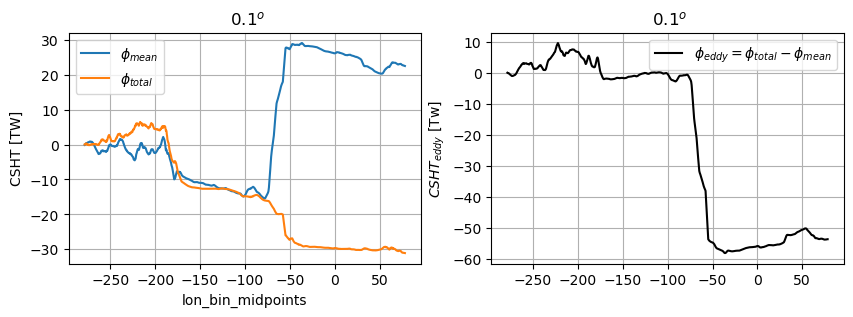

In [84]:
# how does cumsum look in panan01 between climatology and full HT
plt.figure(figsize=(10, 3))
plt.subplot(1,2,1)
(P01_clim_binnedCSHTandZCmean/1e12).cumsum().plot(label=r"$\phi_{mean}$")
plt.plot(P01_binned_lon,(P01_binned_CSHT_mean+P01_binned_ZC_mean).cumsum()*p01_factor/1e12,label=r"$\phi_{total}$")
plt.title(r" $0.1^{o}$")
plt.ylabel('CSHT [TW]')
plt.legend()
plt.grid()


plt.subplot(1,2,2)
plt.plot(P01_binned_lon,np.cumsum(Eddy_HT) ,color='black',label=r"$\phi_{eddy}=\phi_{total}-\phi_{mean}$")
plt.title(r" $0.1^{o}$")
plt.ylabel(r"$CSHT_{eddy}$ [Tw]")
plt.legend()
plt.grid()

According to this plot, the climatology brings heat out of teh Antarctic Peninsula, but eddies more than compensate than and brings heat into the Antarctic Peninsula. It is possible, but I'd need to make sure this is not insanity. Let's think about what that would mean in terms of variables and tracers...


**West Antarctic Peninsula**
A positive mean HT suggests heat leaving the AP in the climatology. For that to happen we would need a compination of either:

[a] Nortward velocities along the isobath + warm temperatures off the shelf

[b] Southward velocities  + warm temperatures off the shelf.

**East Antarctic Peninsula - or Weddel Sea**
A positive mean HT suggests ...

[a] Eastward velocities along the isobath + cold temperatures on the shelf

[b] Westward velocities + warm temperatures off the shelf.

Let's check these vars

In [78]:
# #importing speed and T
U01 = cc.querying.getvar(exp01,'uo',session,frequency='1 monthly',start_time=start_time,end_time=end_time).sel(time=time_slice).sel(yh=lat_range).sel(z_l=slice(0,1000)).mean('time')
V01 = cc.querying.getvar(exp01,'vo',session,frequency='1 monthly',start_time=start_time,end_time=end_time).sel(time=time_slice).sel(yq=lat_range).sel(z_l=slice(0,1000)).mean('time')
T01 = cc.querying.getvar(exp01,'thetao',session,frequency='1 monthly',start_time=start_time,end_time=end_time).sel(time=time_slice).sel(yh=lat_range).sel(z_l=slice(0,1000)).mean('time')
Vo01 = cc.querying.getvar(exp01,'volcello',session,ncfile='%month_z%',start_time=start_time,end_time=end_time).sel(time=time_slice).sel(yh=lat_range).sel(z_l=slice(0,1000)).mean('time')
# # Averaging speed, U and V in the top 1000 m
U01=U01.weighted(Vo01.interp(xh=U01.xq).fillna(0)).mean('z_l')
V01=V01.weighted(Vo01.interp(yh=V01.yq).fillna(0)).mean('z_l')
T01=T01.weighted(Vo01.fillna(0)).mean('z_l')
#loading
T01=T01.load()
U01=U01.load()
V01=V01.load()

(-100.0, -30.0)

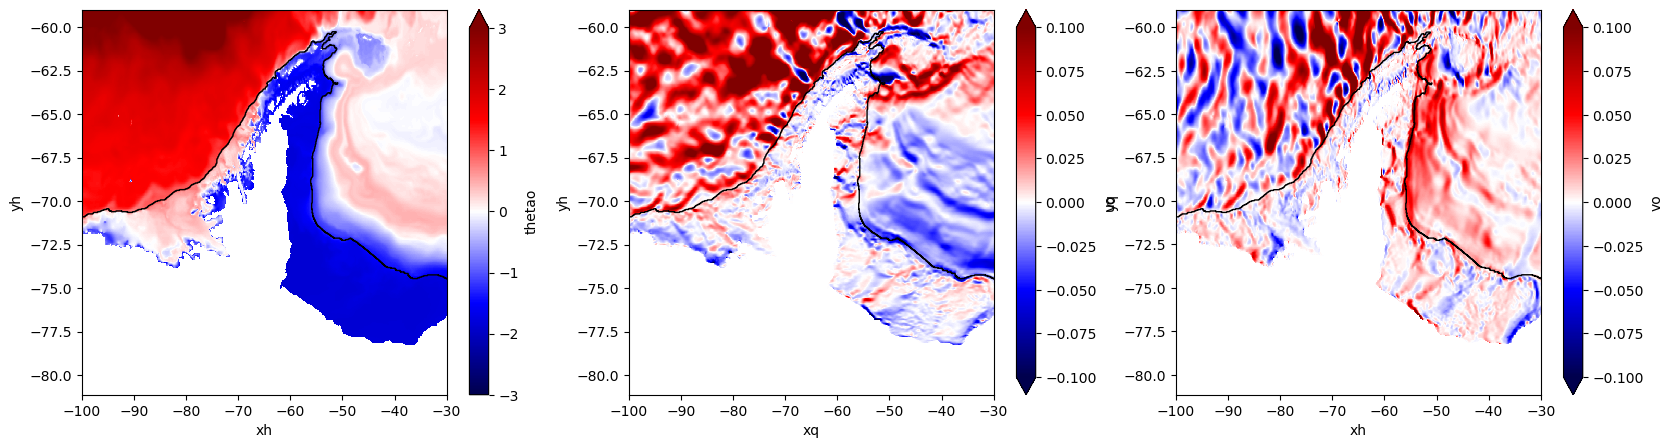

In [70]:
plt.figure(figsize=(20, 5))
plt.subplot(1,3,1)
(T01).plot(vmin=-3,vmax=3,cmap='seismic') #added 1.8 here for the freezing temperature corrections
plt.plot(P01_unbinned_lon,P01_unbinned_lat,'black',lw=1)
plt.xlim(-100,-30)

plt.subplot(1,3,2)
U01.plot(vmin=-.1,vmax=.1,cmap='seismic')
plt.plot(P01_unbinned_lon,P01_unbinned_lat,'black',lw=1)
plt.xlim(-100,-30)

plt.subplot(1,3,3)
V01.plot(vmin=-.1,vmax=.1,cmap='seismic')
plt.plot(P01_unbinned_lon,P01_unbinned_lat,'black',lw=1)
plt.xlim(-100,-30)

On the Weddell Sea, and the East of the Antarctic Peninsula, we do seem to have mostly westward velocities in the climatology,while water are warmer off the shelf. This indeed suggests that on the East of the Antarctic peninsula, the climatological mean CSHT would be bringing heat to the shelf. That is so Interesting!!!

Ok, now that we have some peace of mind that the calculation is correct, lets go back to see what goes on East ANtarctica

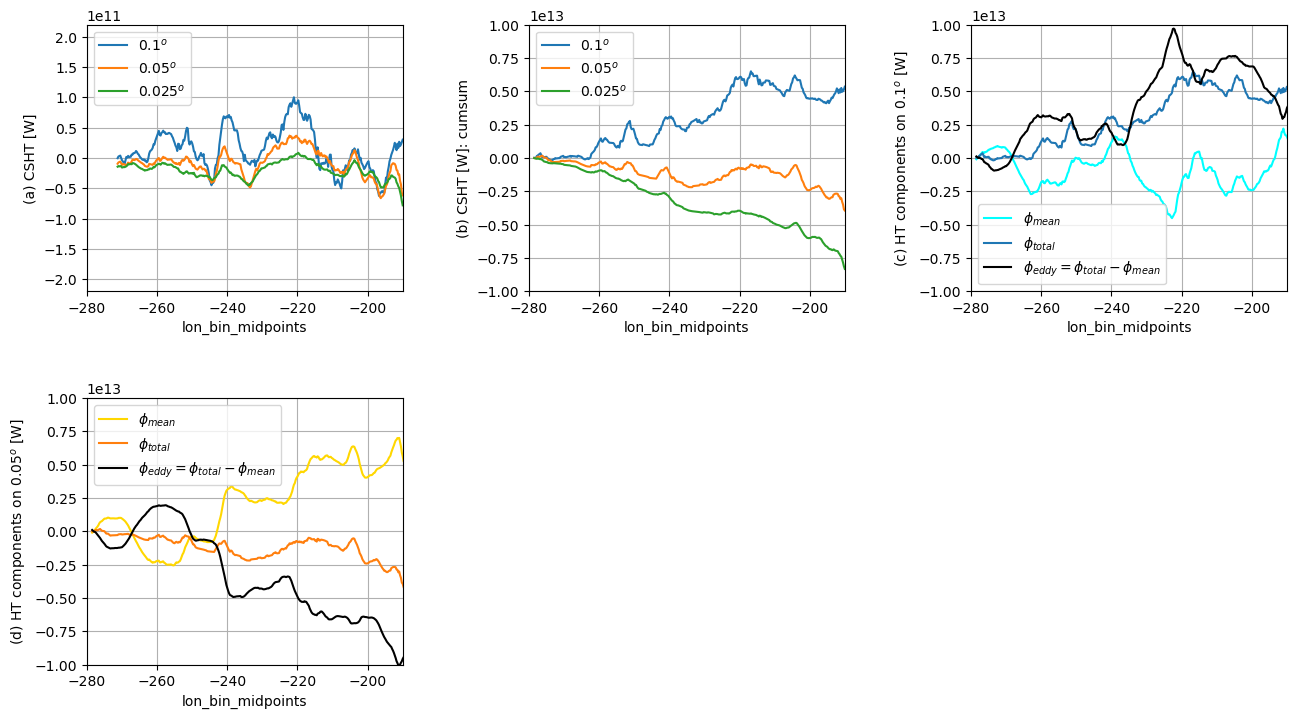

In [87]:
plt.figure(figsize=(15, 8))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

plt.subplot(2,3,1)
P01_total_daily_EA.rolling(lon_bin_midpoints=rollwin).mean().plot(label=r"$0.1^{o}$")
P005_total_daily_EA.rolling(lon_bin_midpoints=rollwin).mean().plot(label=r"$0.05^{o}$")
P0025_total_daily_EA.rolling(lon_bin_midpoints=rollwin).mean().plot(label=r"$0.025^{o}$") #actually it is monthly
plt.legend(); plt.ylabel('(a) CSHT [W]'); plt.ylim([-2.2e11,2.2e11])
plt.grid()
plt.xlim(-280,-190)


plt.subplot(2,3,2)
P01_total_daily_EA.cumsum().plot(label=r"$0.1^{o}$")
P005_total_daily_EA.cumsum().plot(label=r"$0.05^{o}$")
P0025_total_daily_EA.cumsum().plot(label=r"$0.025^{o}$")
plt.legend(); plt.ylabel('(b) CSHT [W]: cumsum');
plt.grid();plt.ylim(-10e12,10e12)
plt.xlim(-280,-190)

plt.subplot(2,3,3)
(P01_clim_binnedCSHTandZCmean).cumsum().plot(color="cyan",label=r"$\phi_{mean}$")
plt.plot(P01_binned_lon,(P01_binned_CSHT_mean+P01_binned_ZC_mean).cumsum()*p01_factor,color="tab:blue",label=r"$\phi_{total}$")
plt.plot(P01_binned_lon,np.cumsum(Eddy_HT*1e12) ,color='black',label=r"$\phi_{eddy}=\phi_{total}-\phi_{mean}$")
plt.xlim(-280,-190); plt.ylim(-10e12,10e12)
plt.legend(); plt.ylabel(r"(c) HT components on $0.1^{o}$ [W]");
plt.grid()


plt.subplot(2,3,4)
(P005_clim_binnedCSHTandZCmean).cumsum().plot(color="gold",label=r"$\phi_{mean}$")
plt.plot(P005_binned_lon,(P005_binned_CSHT_mean+P005_binned_ZC_mean).cumsum()*p005_factor,color="tab:orange",label=r"$\phi_{total}$")
plt.plot(P005_binned_lon,np.cumsum(Eddy_HT005*1e12) ,color='black',label=r"$\phi_{eddy}=\phi_{total}-\phi_{mean}$")
plt.xlim(-280,-190); plt.ylim(-10e12,10e12)
plt.legend(); plt.ylabel(r"(d) HT components on $0.05^{o}$ [W]");
plt.grid()

plt.savefig(figdir+'RESEA_CSHTeddy_rollingmean.png',dpi=300,bbox_inches='tight')

Ok, This result suggests that:


[a] **On 0.1:** Mean climatological circulation brings heat to the East Antarctic Shelf, but eddies overcompensate generating a net offshore heat transport

[b] **On 0.05:** 

[c] **On 0.025:** 

In [73]:
## Plots for the presentation
import cartopy.crs as ccrs
import cartopy.feature as cft

land_50m = cft.NaturalEarthFeature('physical', 'land', '50m',
                                   edgecolor='black', facecolor='papayawhip', linewidth=0.5)

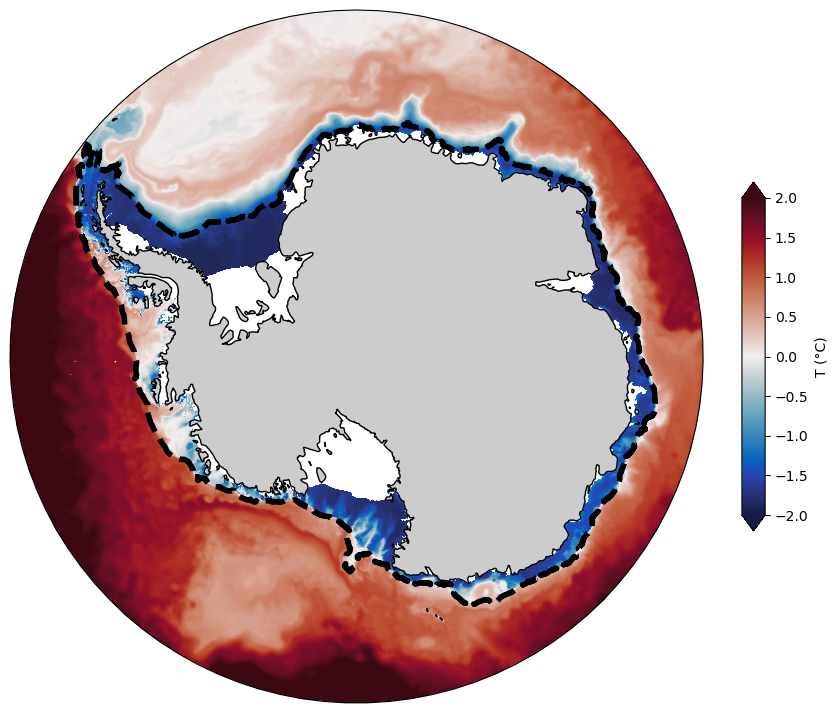

In [76]:
projection = ccrs.SouthPolarStereo()

plt.figure(figsize=(10, 9))
ax = plt.axes(projection=projection)

ax.set_extent([-280, 80, -80, -60], crs=ccrs.PlateCarree())
ax.add_feature(land_50m, color=[0.8, 0.8, 0.8])
ax.coastlines(resolution='50m')

# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.

import matplotlib.path as mpath

theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

T01.plot(x='xh', y='yh',
         transform=ccrs.PlateCarree(),
         vmin=-2, vmax=2, extend='both',
         cmap=cm.cm.balance,
         cbar_kwargs = {'label': 'T (°C)',
                        'fraction': 0.03,
                        'aspect': 15,
                        'shrink': 0.7});

plt.plot(P0025_unbinned_lon,P0025_unbinned_lat,'--',lw=4,color='black',transform=ccrs.PlateCarree())
plt.savefig(figdir+'map_1kmisobath.png',dpi=300,bbox_inches='tight')

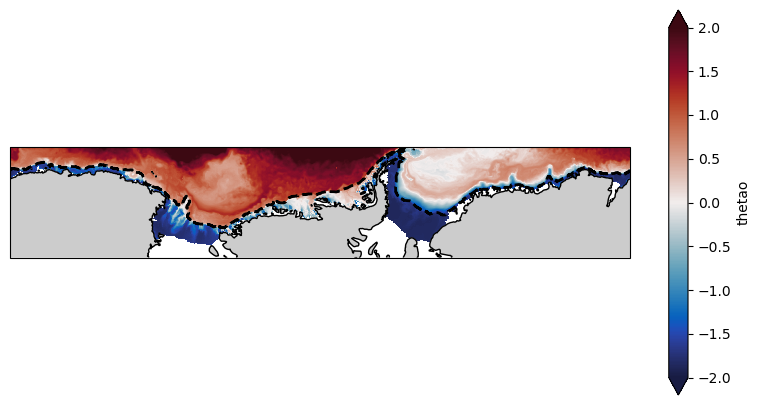

In [77]:
projection = ccrs.Mercator(central_longitude=-100, min_latitude=-80.0, max_latitude=-60.0)

plt.figure(figsize=(10, 5))
ax = plt.axes(projection=projection)

ax.set_extent([-280, 80, -80, -60], crs=ccrs.PlateCarree())
ax.add_feature(land_50m, color=[0.8, 0.8, 0.8])
ax.coastlines(resolution='50m')

T01.plot(x='xh', y='yh',
         transform=ccrs.PlateCarree(),
         vmin=-2, vmax=2, extend='both',
         cmap=cm.cm.balance);
plt.plot(P0025_unbinned_lon,P0025_unbinned_lat,'--',lw=2,color='black',transform=ccrs.PlateCarree())
plt.savefig(figdir+'mapMErcator_1kmisobath.png',dpi=300,bbox_inches='tight')